In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
path = "csv/"

In [2]:
version_mapping = {
    1: "ijk",
    2: "jik",
    3: "jki",
    4: "ikj",
    5: "kij",
    6: "kji"
}

In [3]:
version_mapping.values()

dict_values(['ijk', 'jik', 'jki', 'ikj', 'kij', 'kji'])

In [4]:
all_mat = [2048, 8192]
all_tiles = [4,8,16,32,64,128,256,512]
# all_versions = ['ijk', 'jik', 'jki', 'ikj', 'kij', 'kji']
all_versions = list(range(1,7))

In [5]:
def query(df, versions = all_versions, mat = all_mat, tiles = all_tiles):
    return df[(df["version"].isin(versions)) & (df["matrix_size"].isin(mat)) & (df["tile_size"].isin(tiles))]

In [6]:
df = pd.concat([pd.read_csv(path + "summary_csv_int_8192.csv", index_col=0), pd.read_csv(path + "summary_csv_int.csv", index_col=0)])
df["version_word"] = df["version"].apply(lambda x: version_mapping[int(x[1])])
df["version"] = df["version"].apply(lambda x: int(x[1]))
df["cache-hit-rate"] = 100*(1-df["cache-misses"]/df["cache-references"])
df["l1d-read-hit-rate"] = 100*(1-df["l1d-read-misses"]/df["l1d-read-accesses"])
df["ll-read-hit-rate"] = 100*(1-df["ll-read-misses"]/df["ll-read-accesses"])
df["IPC"] = df["instructions"]/df["cpu-cycles"]
df["time-elapsed"] = df["time-elapsed"].apply(lambda x: eval(x.split(".")[0].replace("m","*60*").replace("h","*3600*")))
df

,version,matrix_size,tile_size,instructions,cpu-cycles,branch-misses,branch-instructions,cache-references,cache-misses,dtlb-read-accesses,...,ll-read-misses,ll-write-accesses,ll-write-misses,time-elapsed,page_fault,version_word,cache-hit-rate,l1d-read-hit-rate,ll-read-hit-rate,IPC
0,6,8192,8,25828147672293,8572364783866,1078259498,784676399861,112044107160,79652589978,8871438067508,...,13705369006,21272,13770,39780,0,kji,28.909612,99.339799,22.557575,3.012955
1,4,8192,8,25836139633268,6376008686654,1078449767,784975806096,7451850200,1378160317,8872964926772,...,66375249,17125,3451,48960,0,ikj,81.505797,99.816117,91.887065,4.052087
2,2,8192,4,27248747866721,9155486801154,8039091,1090647980035,105324901673,70434635852,9687388321981,...,30451315915,2204161,867852,158400,0,jik,33.126322,99.139147,15.366304,2.976221
3,2,8192,64,24851895910355,8103868366516,8730637174,575781732329,403790175351,2546922881,8314822711971,...,233073350,7978097,9741,113520,0,jik,99.369246,93.578949,99.880615,3.066671
4,1,8192,64,24852151995329,7506802923063,8733749983,575781893539,16219272895,1821410564,8314871269810,...,195126150,2191497,2635,72000,0,ijk,88.770085,93.602735,97.947633,3.310617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49,5,2048,4,425839509113,98926432698,345787,17043755183,143836747,30958600,151409446943,...,2118983,382,297,32,0,kij,78.476571,99.800877,48.858774,4.304608
50,6,2048,64,388348973596,116467205250,136453512,8996977804,193194560,20780963,129921391432,...,1989179,47493,42,37,0,kji,89.243505,93.596497,98.442500,3.334406
51,3,2048,256,386874281850,139058988603,33696240,8688872572,16082578177,3852676,129112633240,...,279605,920128,34,45,0,jki,99.976044,93.356050,99.996589,2.782088
52,2,2048,4,425364906231,106427720443,318197,17026707499,1239493863,114625515,151259066695,...,10847838,61848,6413,34,0,jik,90.752232,99.430687,97.693781,3.996749


In [7]:
df.columns

Index(['version', 'matrix_size', 'tile_size', 'instructions', 'cpu-cycles',
       'branch-misses', 'branch-instructions', 'cache-references',
       'cache-misses', 'dtlb-read-accesses', 'dtlb-read-misses',
       'dtlb-write-misses', 'dtlb-write-accesses', 'l1d-read-accesses',
       'l1d-read-misses', 'l1d-write-accesses', 'll-read-accesses',
       'll-read-misses', 'll-write-accesses', 'll-write-misses',
       'time-elapsed', 'page_fault', 'version_word', 'cache-hit-rate',
       'l1d-read-hit-rate', 'll-read-hit-rate', 'IPC'],
      dtype='object')

## Versions & Block

In [8]:
version_ticks = [""] + [version_mapping[i] for i in range(1,7)] + [""]

In [9]:
def plot_version(parameter, tiles = all_tiles, mat = all_mat):
    fig = plt.figure(figsize=(8,4))
    ax = fig.gca()
    for ind,tile in enumerate(tiles):
        df_tile = query(df, tiles=[tile], mat=mat)
        ax.bar(np.array(df_tile["version"])+0.1*ind, df_tile[parameter], width=0.1, label=tile)
    ax.set_xticklabels(version_ticks)
    ax.set_ylabel(parameter)
    ax.set_xlabel("version")
    ax.set_title(parameter)
    sns.despine()
    plt.legend(bbox_to_anchor=(1.2,1))
    

def plot_tile(parameter, tiles = all_tiles, mat = all_mat, base_log=None):
    fig = plt.figure(figsize=(8,4))
    ax = fig.gca()
    for ver in range(1,7):
        df_tile = query(df, versions=[ver], tiles=tiles, mat=mat)
        if base_log:
            ax.bar(np.array(np.log2(df_tile["tile_size"]))+0.1*(3-ver), np.log2(df_tile[parameter]), width=0.1, label=version_mapping[ver])
        else:
            ax.bar(np.array(np.log2(df_tile["tile_size"]))+0.1*(3-ver), df_tile[parameter], width=0.1, label=version_mapping[ver])

    ax.set_ylabel(parameter)
    ax.set_xlabel("tiles")
    ax.set_xticklabels([""] + sorted(tiles) +[""])
    ax.set_title(parameter)
    sns.despine()
    plt.legend(bbox_to_anchor=(1.2,0.5))

## Version on x-axis

/tmp/ipykernel_108144/1955420269.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(version_ticks)


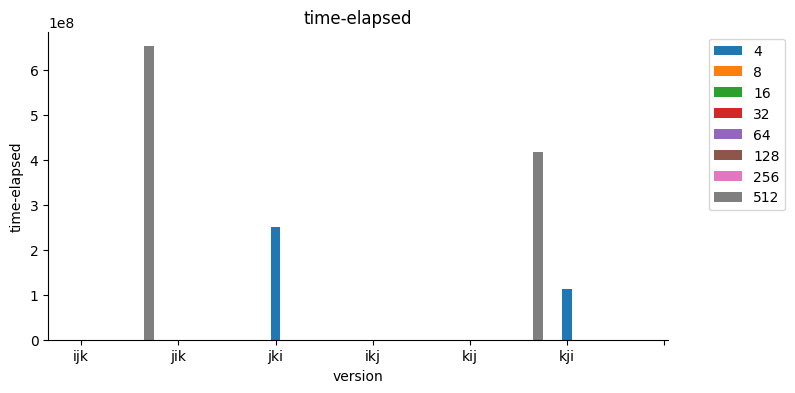

In [10]:
plot_version("time-elapsed", tiles=[4,8,16,32,64,128,256,512], mat=[8192])

/tmp/ipykernel_108144/1955420269.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([""] + sorted(tiles) +[""])


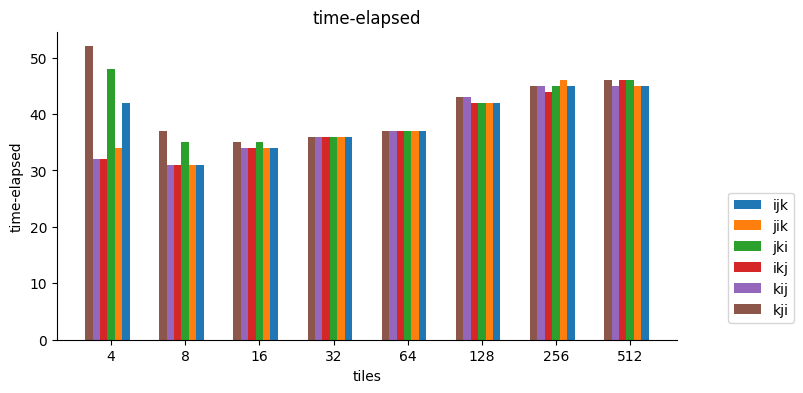

In [11]:
plot_tile("time-elapsed", tiles=[4,8,16,32,64,128,256,512], mat=[2048])

/tmp/ipykernel_108144/1955420269.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([""] + sorted(tiles) +[""])


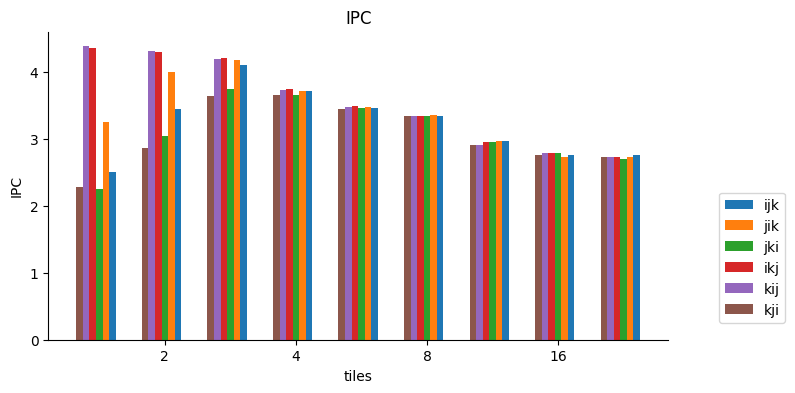

In [12]:
plot_tile("IPC", tiles=[2,4,8,16,32,64,128,256,512], base_log=None, mat=[2048])

/tmp/ipykernel_18391/769922595.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(version_ticks)
/tmp/ipykernel_18391/769922595.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(version_ticks)
/tmp/ipykernel_18391/769922595.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(8,4))


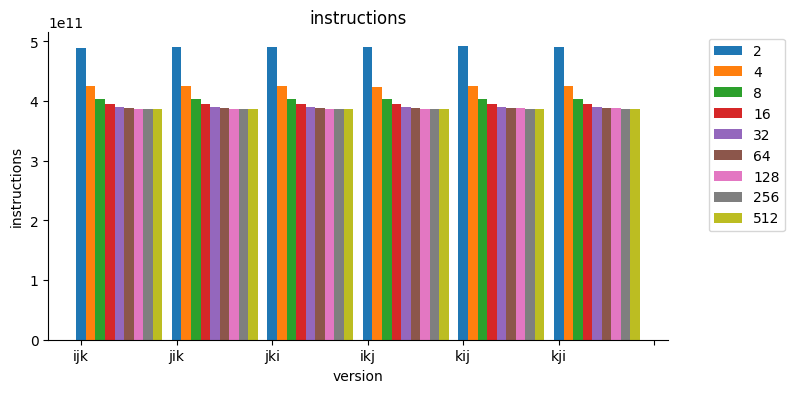

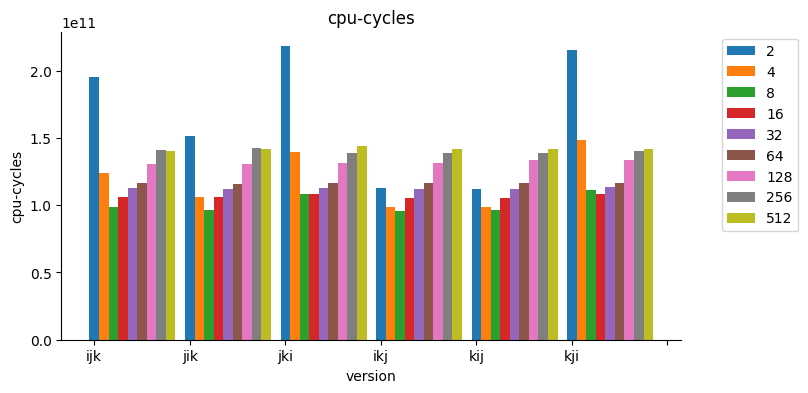

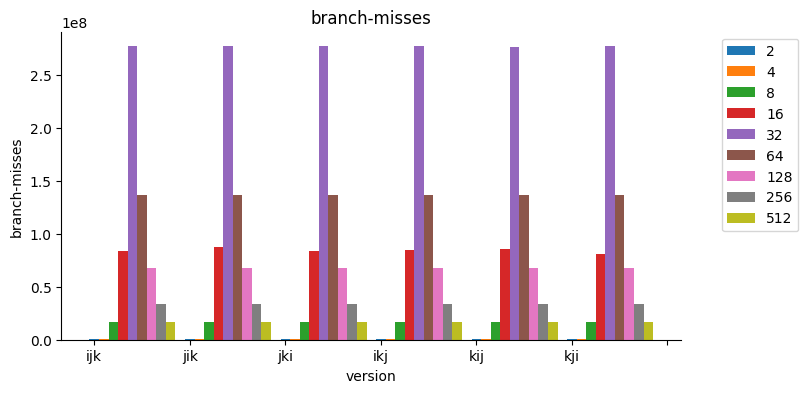

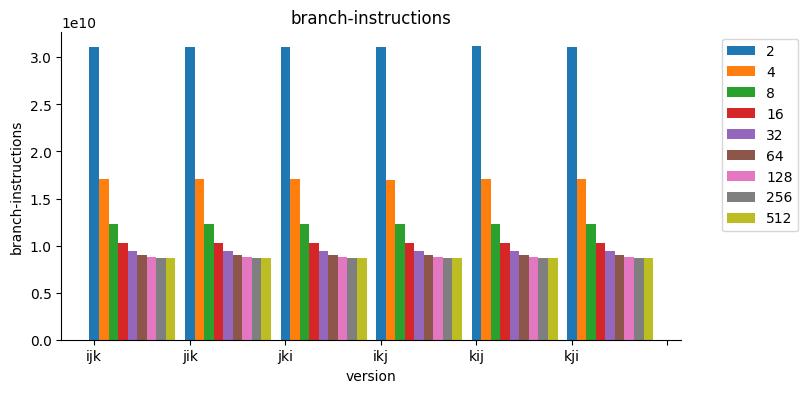

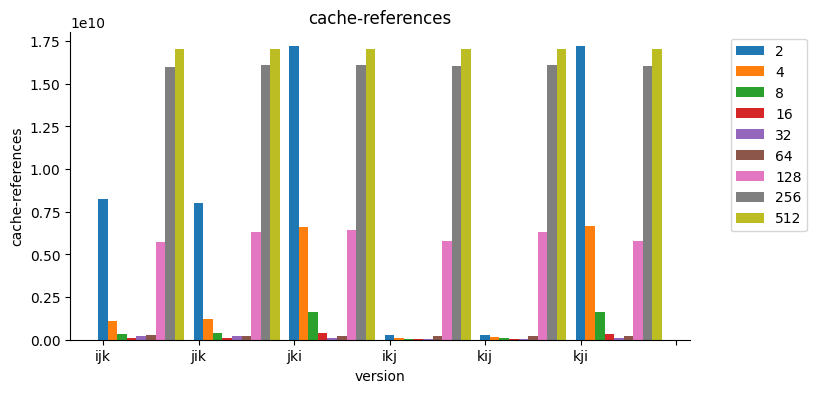

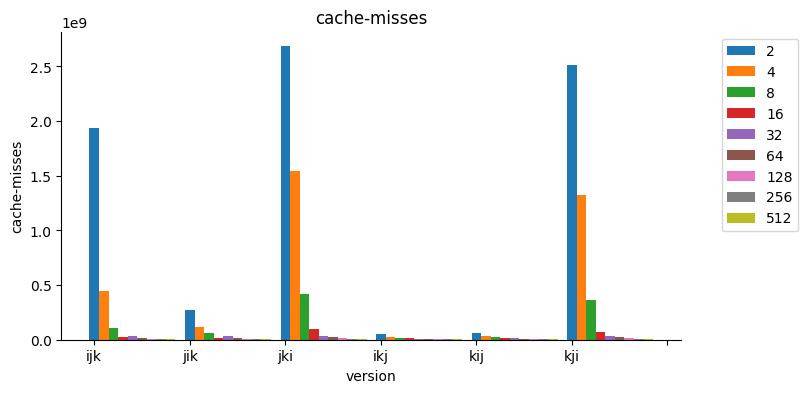

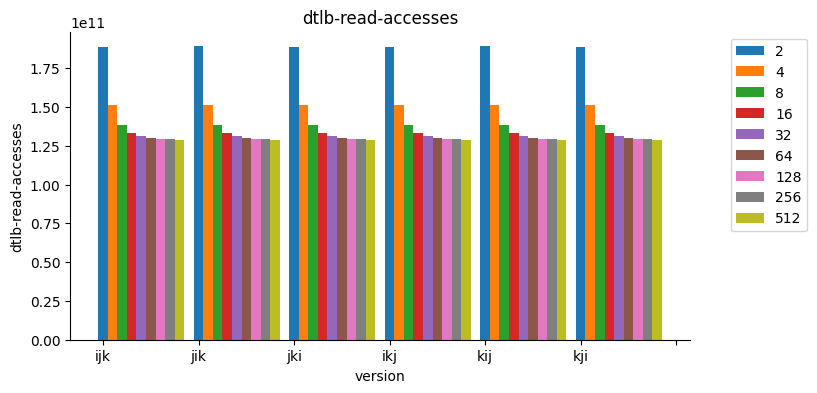

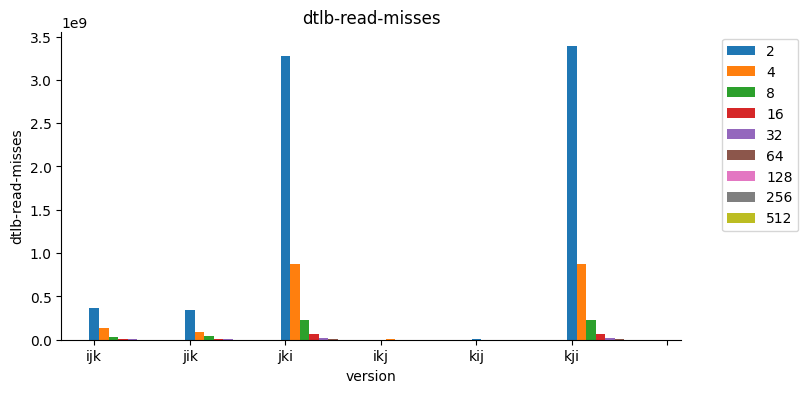

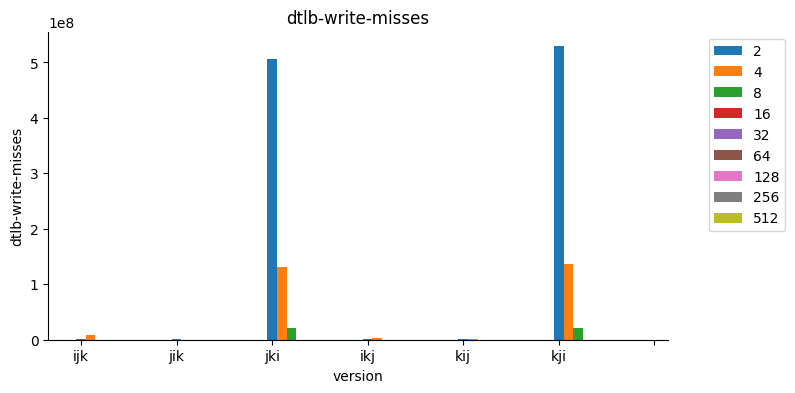

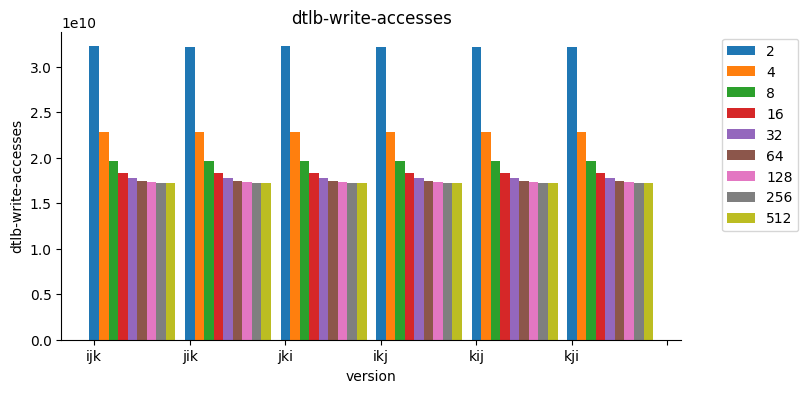

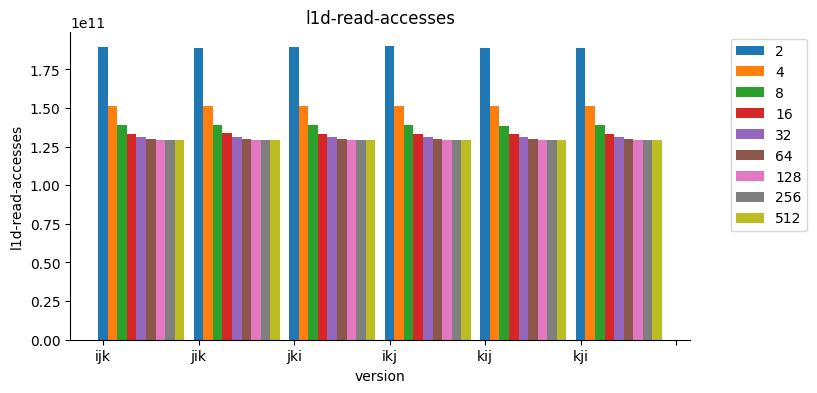

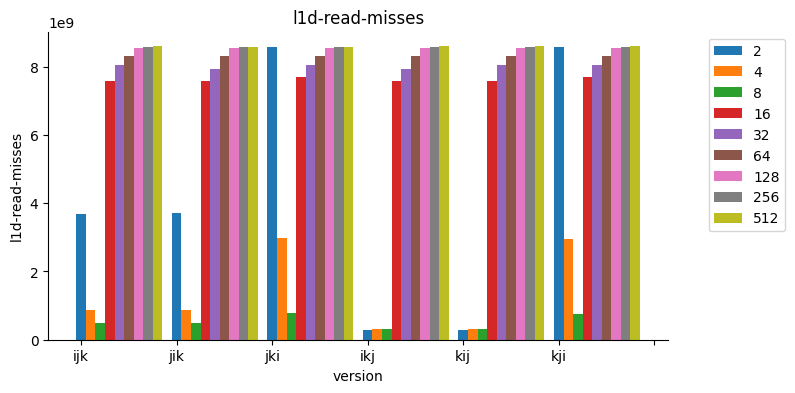

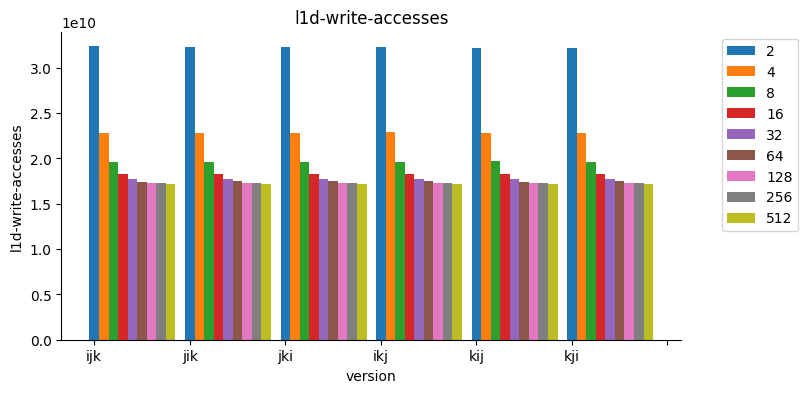

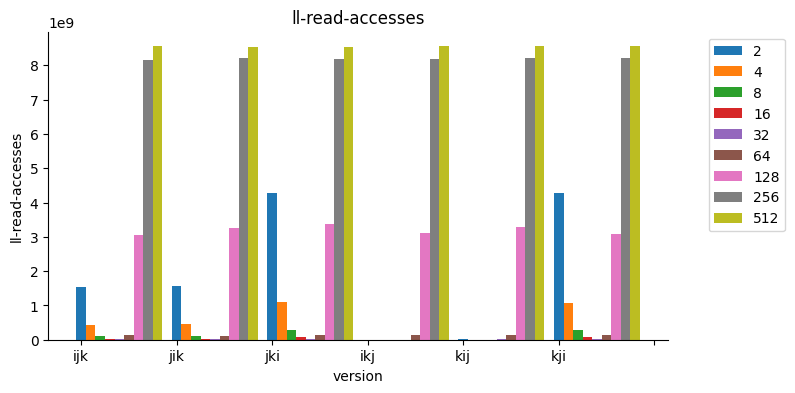

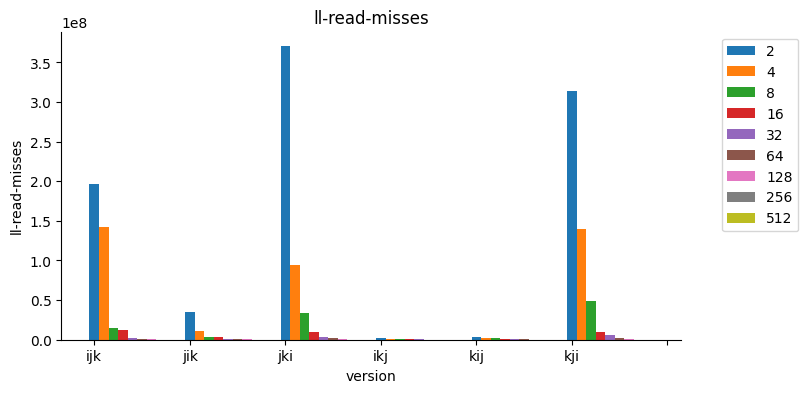

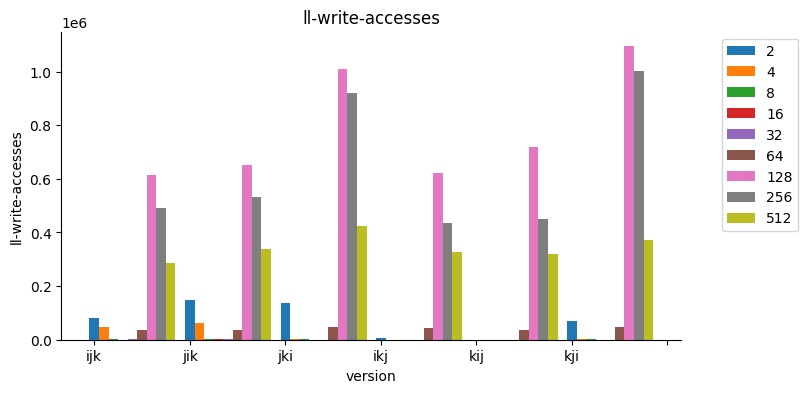

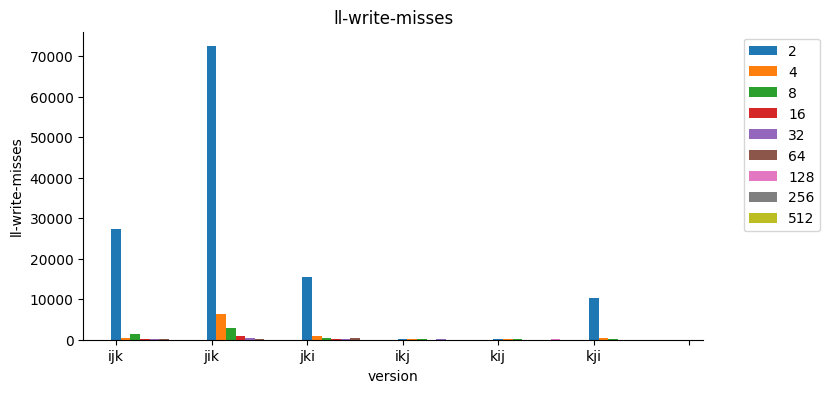

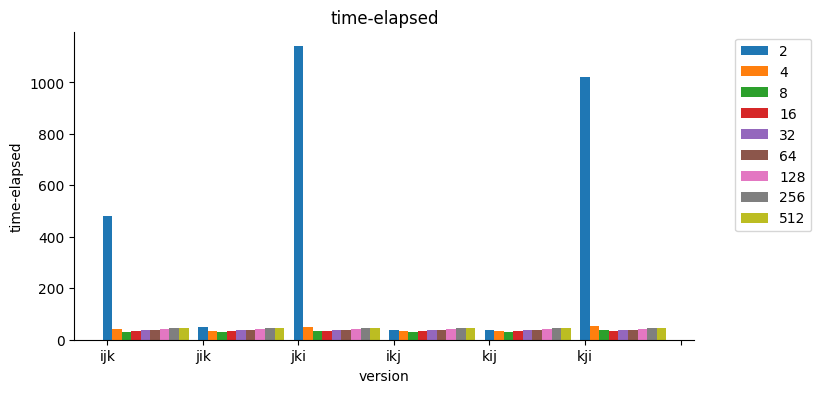

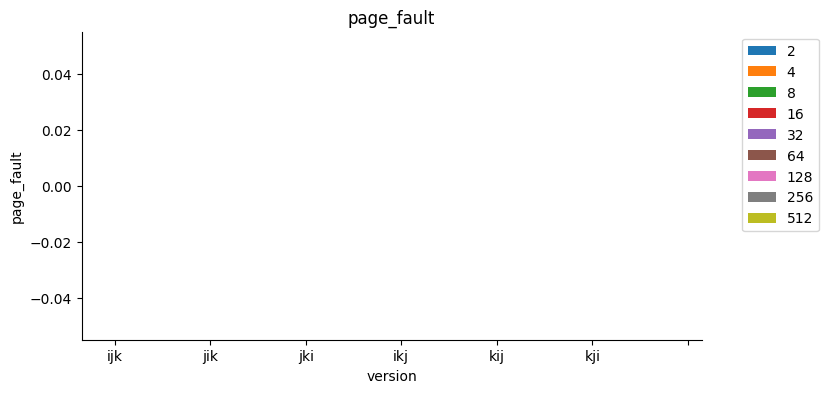

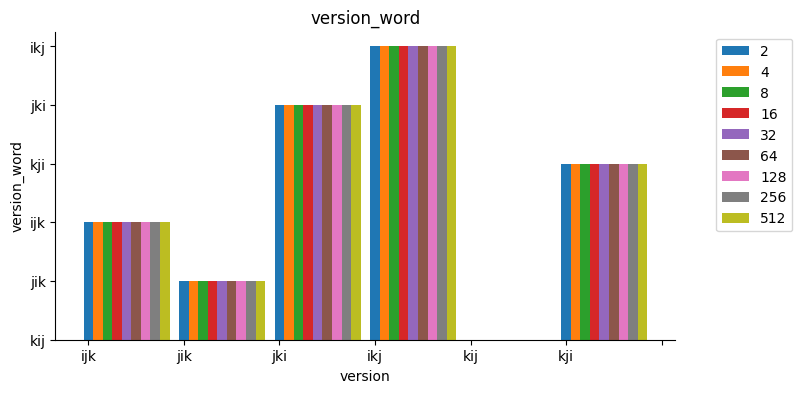

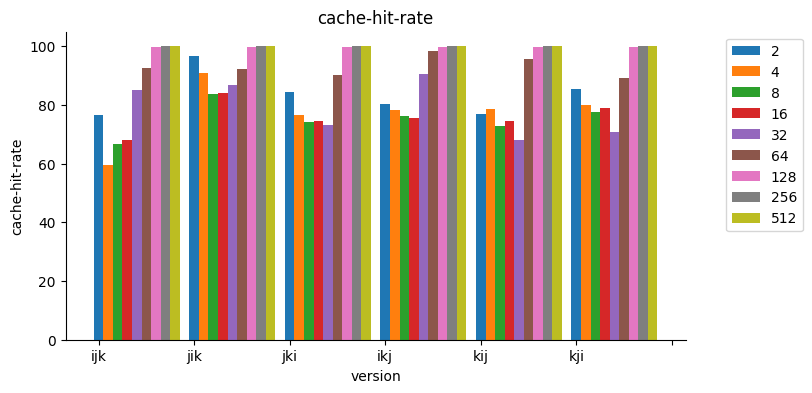

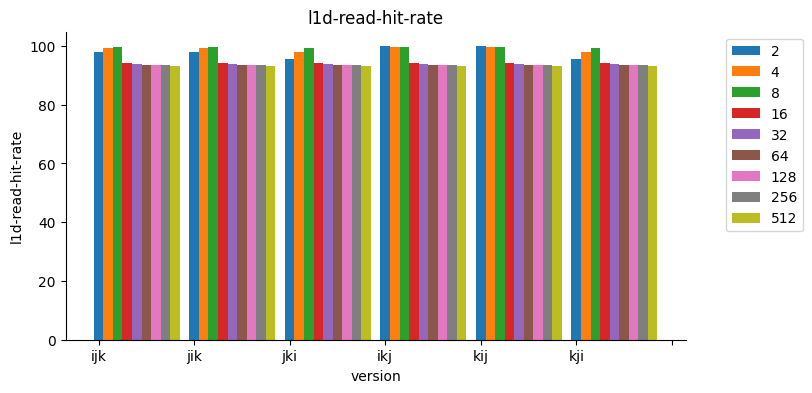

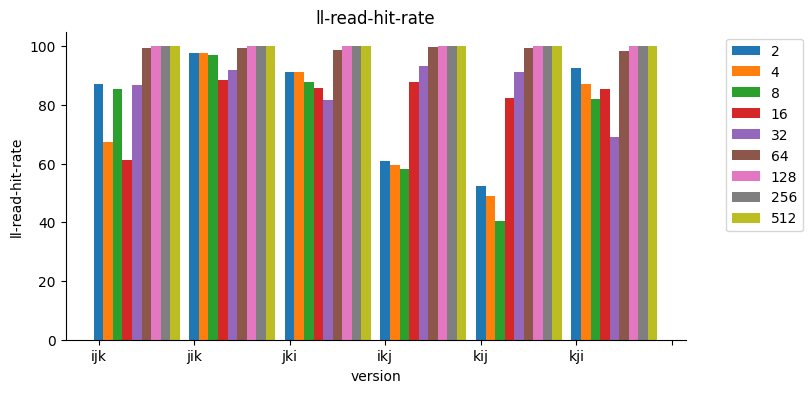

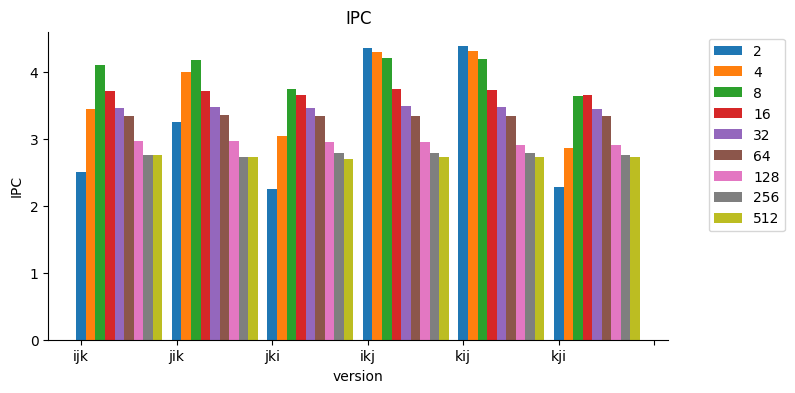

In [48]:
parameter = "ll-read-misses"
for parameter in df_2048.columns[3:]:
    fig = plt.figure(figsize=(8,4))
    ax = fig.gca()
    for ind,tile in enumerate(all_tiles):
        df_tile = query(df, tiles=[tile], mat = [2048])
        ax.bar(np.array(df_tile["version"])+0.1*ind, df_tile[parameter], width=0.1, label=tile)
    ax.set_xticklabels(version_ticks)
    ax.set_ylabel(parameter)
    ax.set_xlabel("version")
    ax.set_title(parameter)
    sns.despine()
    

/tmp/ipykernel_78430/610979859.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(version_ticks)
/tmp/ipykernel_78430/610979859.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(version_ticks)
/tmp/ipykernel_78430/610979859.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(version_ticks)
/tmp/ipykernel_78430/610979859.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,3))


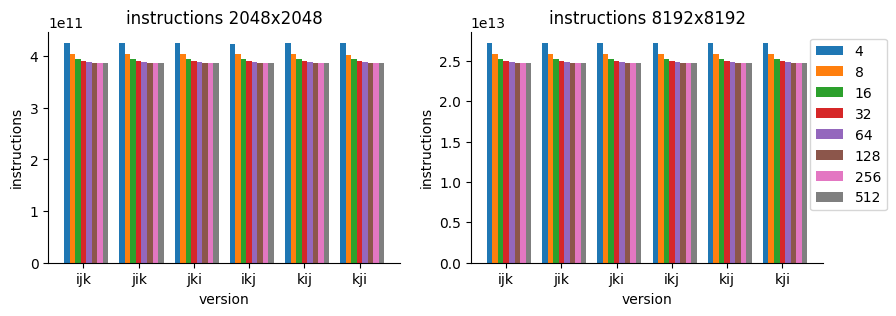

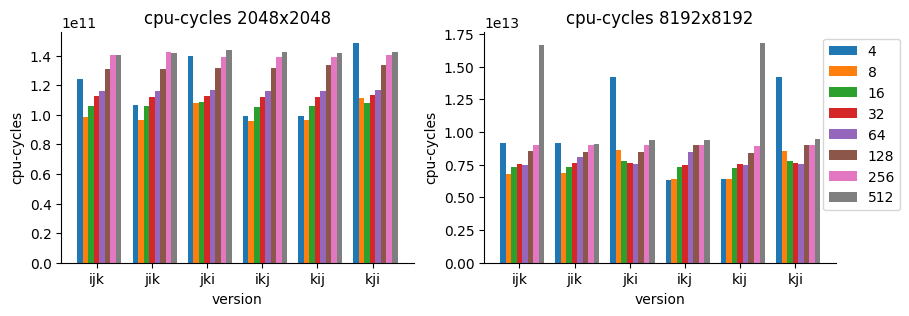

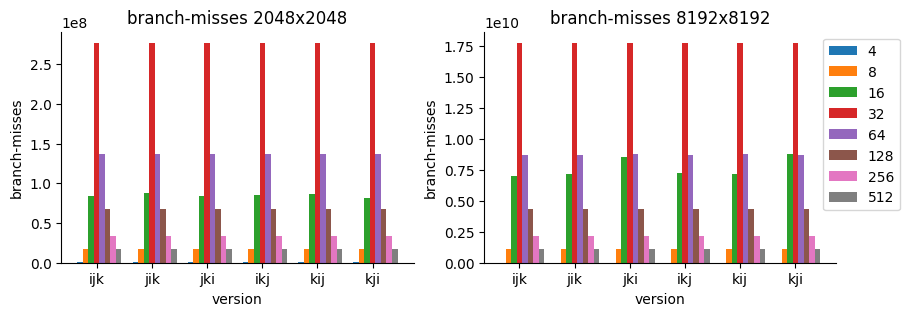

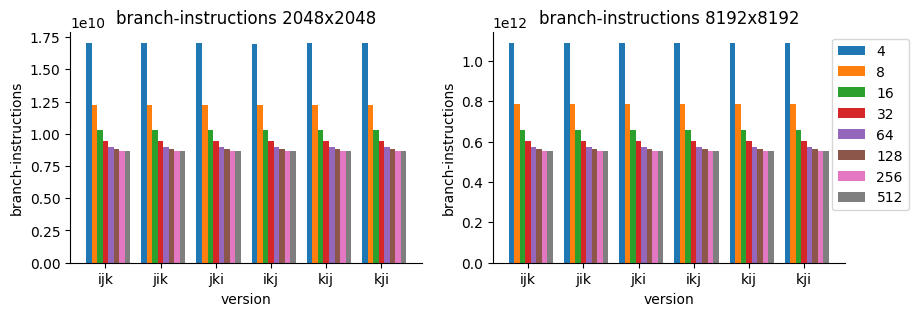

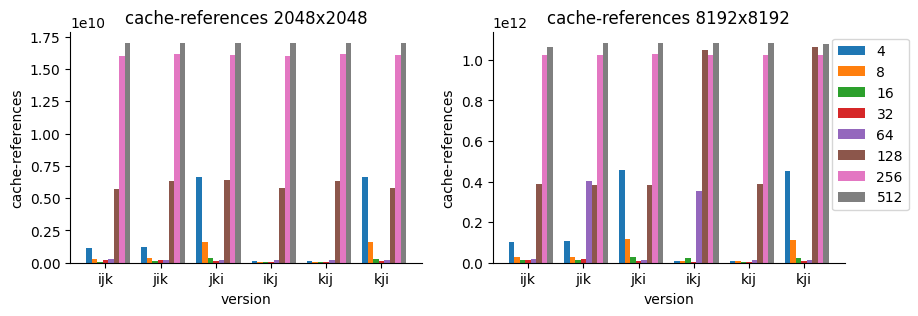

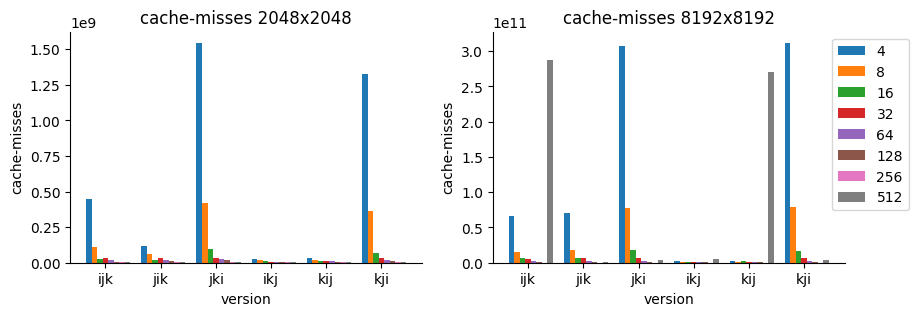

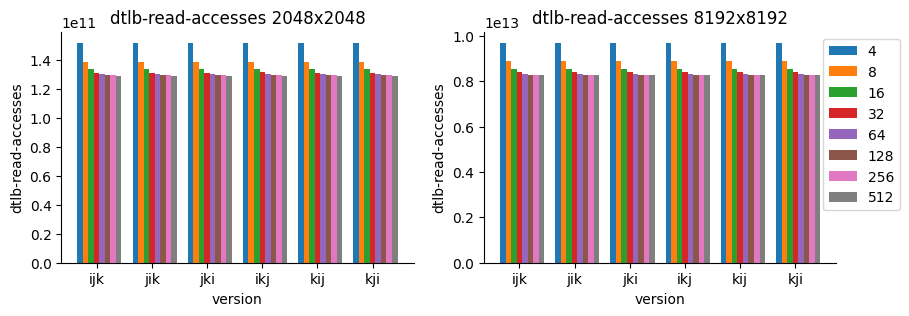

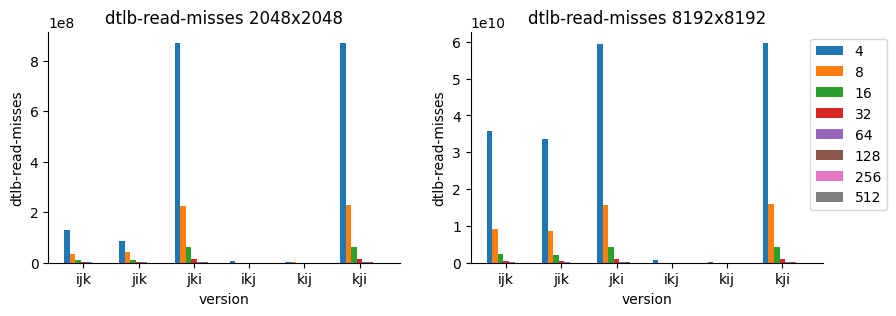

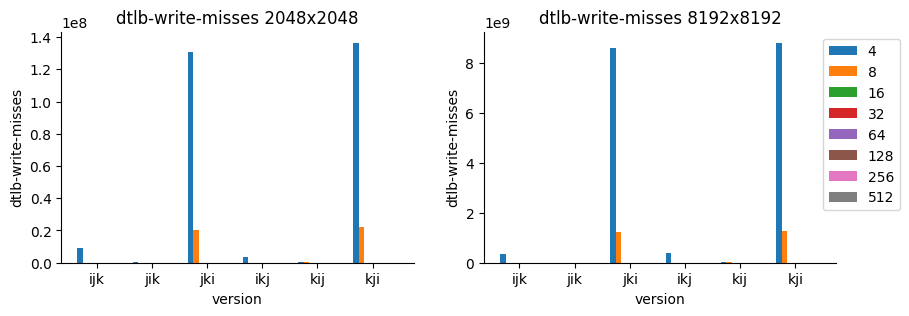

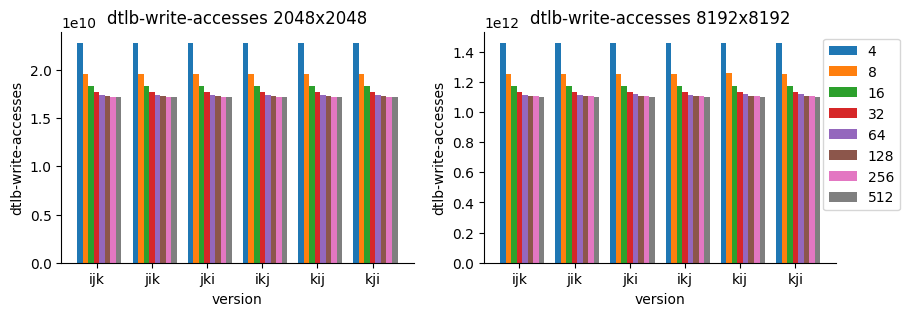

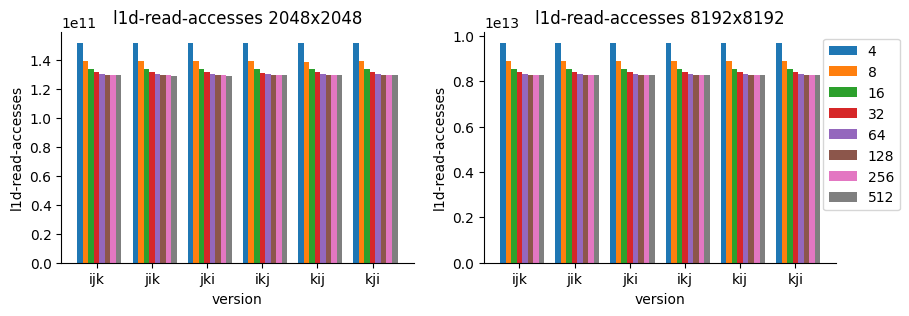

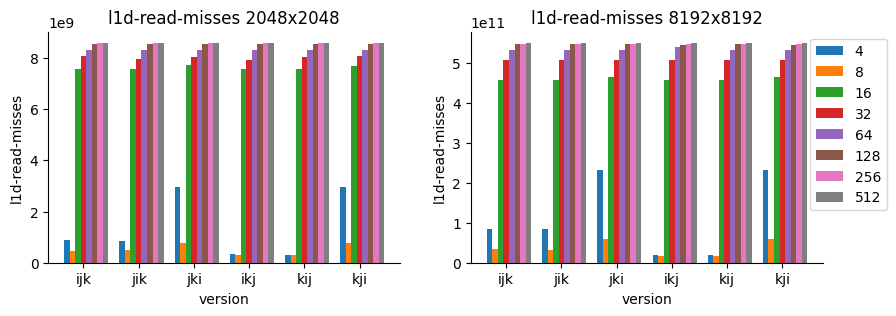

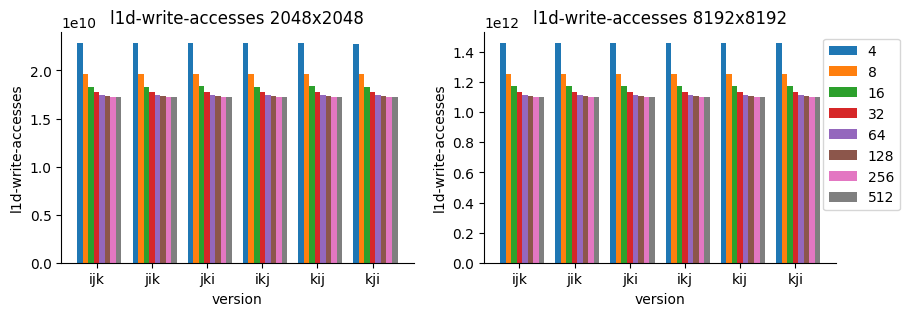

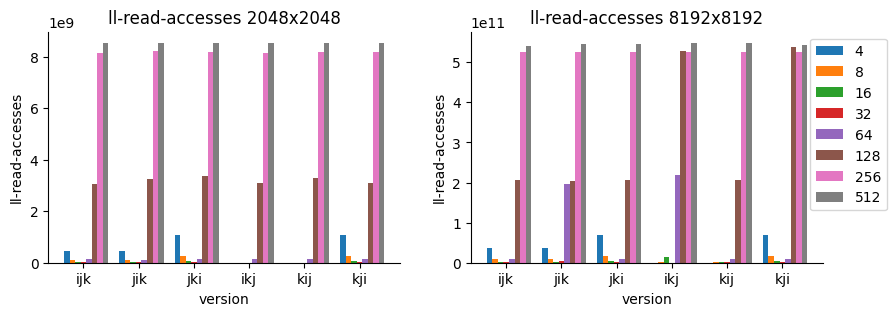

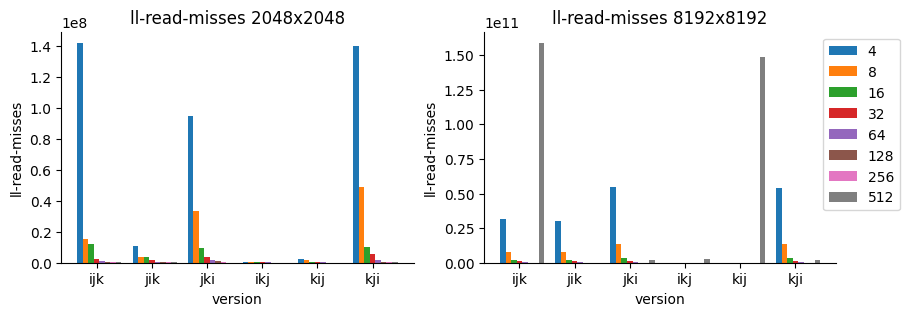

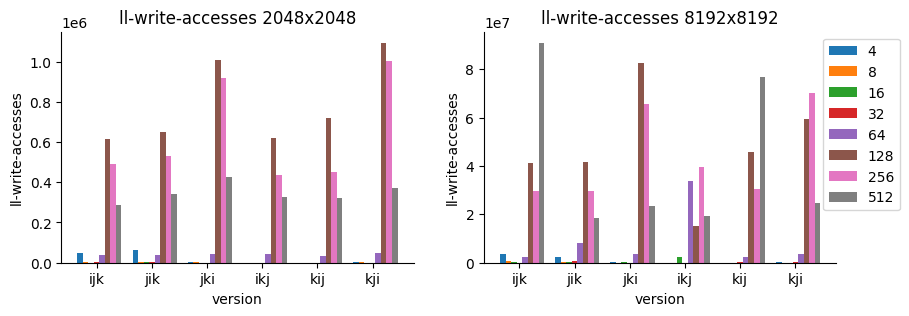

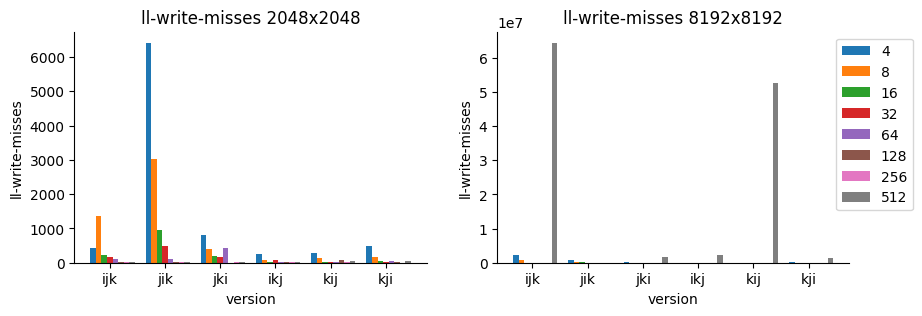

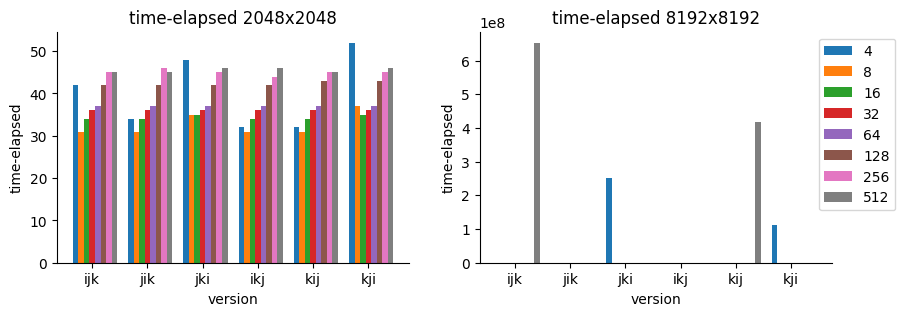

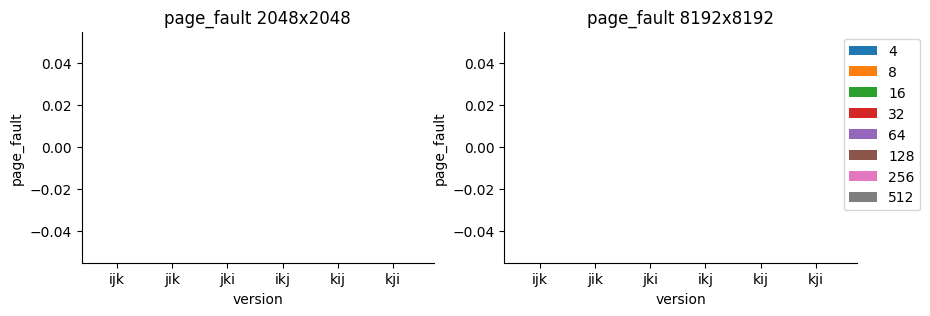

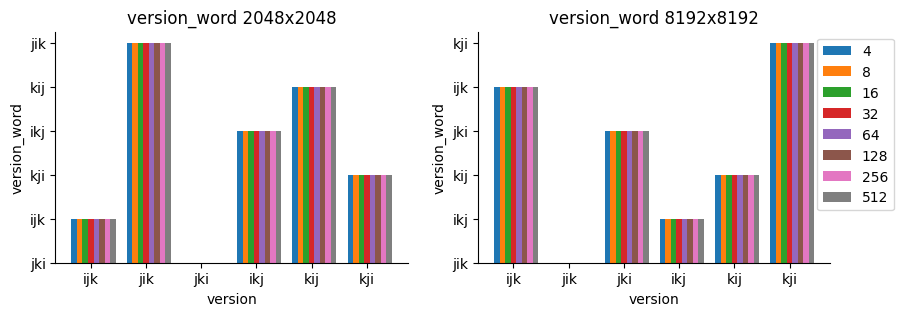

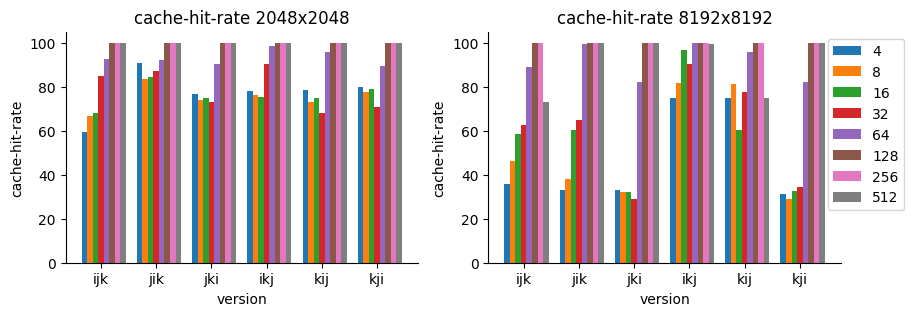

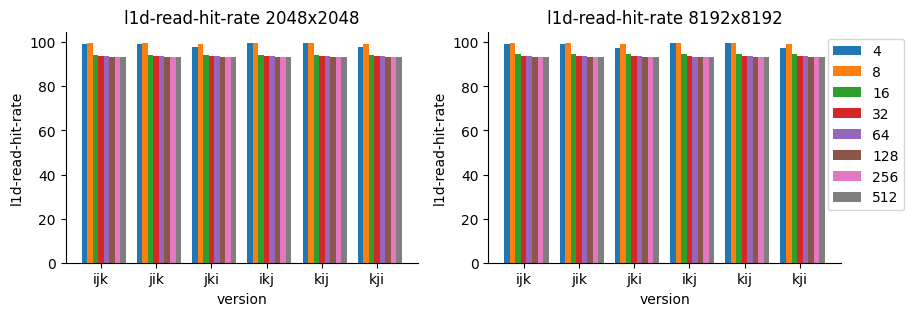

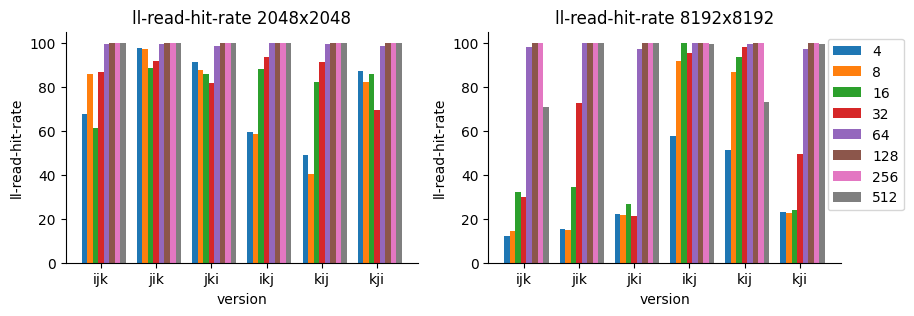

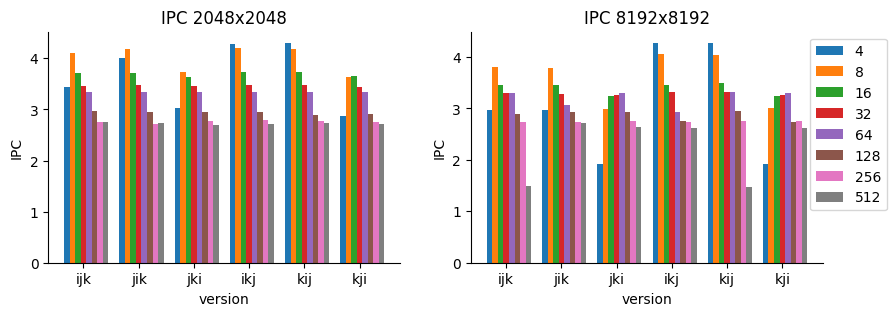

In [20]:
parameter = "ll-read-misses"

def plot_parameter(ax, parameter, mat):
    for ind,tile in enumerate(all_tiles):
        df_tile = query(df, tiles=[tile], mat = [mat])
        ax.bar(np.array(df_tile["version"])+0.1*(ind-3), df_tile[parameter], width=0.1, label=tile)
        
    ax.set_xticklabels(version_ticks)
    ax.set_ylabel(parameter)
    ax.set_xlabel("version")
    ax.set_title(parameter + f" {mat}x{mat}")
    sns.despine()

for parameter in df.columns[3:]:
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,3))
    plot_parameter(ax1, parameter, 2048)
    plot_parameter(ax2, parameter, 8192)
    plt.legend(bbox_to_anchor=(1.2,1))

In [24]:
df_2048.columns

Index(['version', 'matrix_size', 'tile_size', 'instructions', 'cpu-cycles',
       'branch-misses', 'branch-instructions', 'cache-references',
       'cache-misses', 'dtlb-read-accesses', 'dtlb-read-misses',
       'dtlb-write-misses', 'dtlb-write-accesses', 'l1d-read-accesses',
       'l1d-read-misses', 'l1d-write-accesses', 'll-read-accesses',
       'll-read-misses', 'll-write-accesses', 'll-write-misses',
       'time-elapsed', 'page_fault', 'version_word', 'cache-hit-rate',
       'l1d-read-hit-rate', 'll-read-hit-rate'],
      dtype='object')

/tmp/ipykernel_18391/2595548675.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(version_ticks)
/tmp/ipykernel_18391/2595548675.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(8,4))


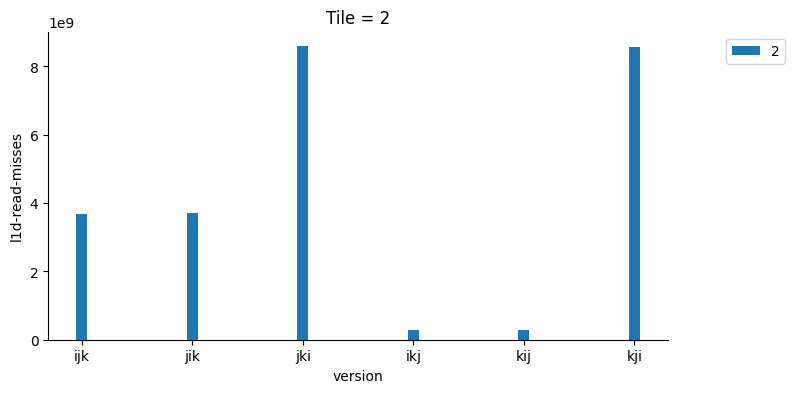

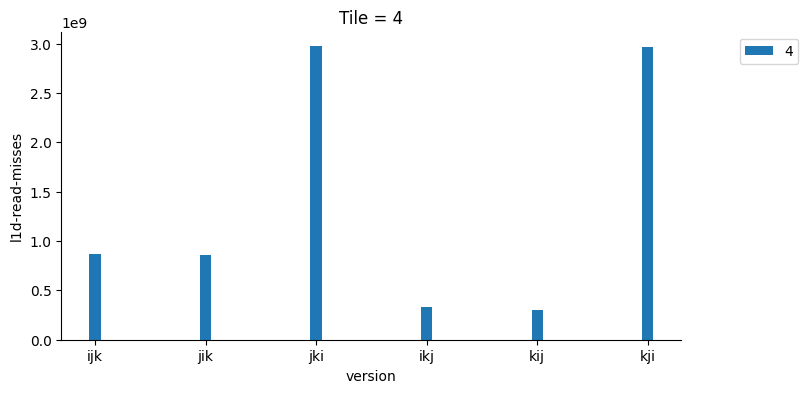

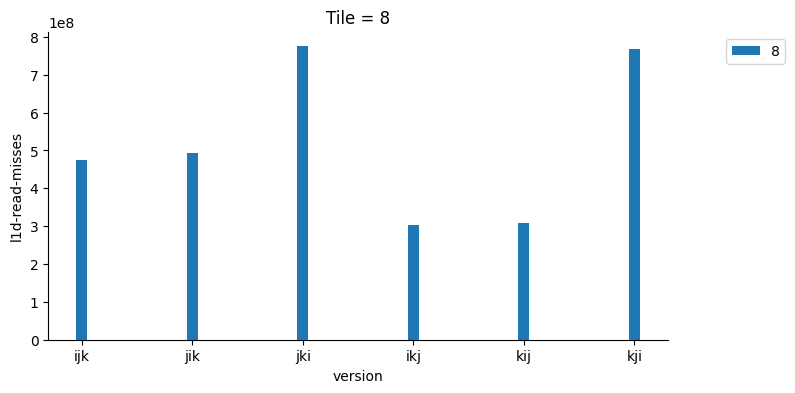

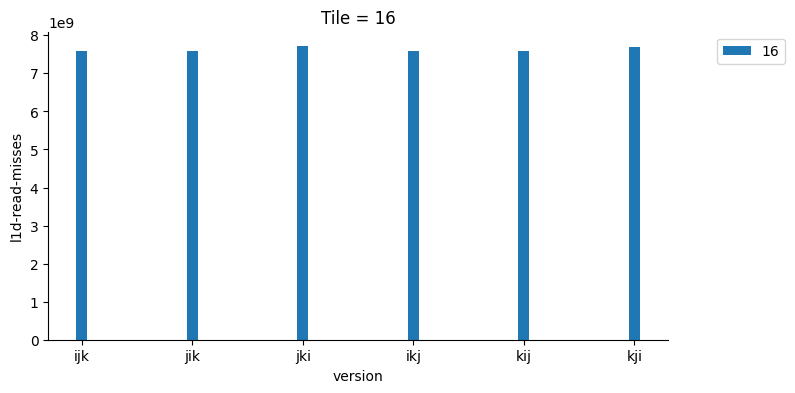

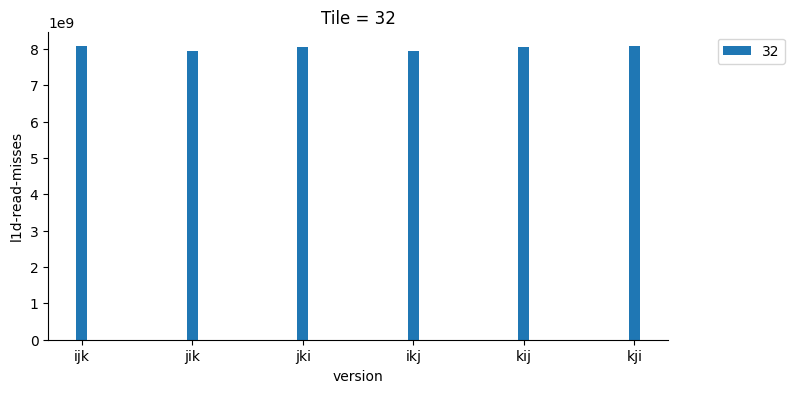

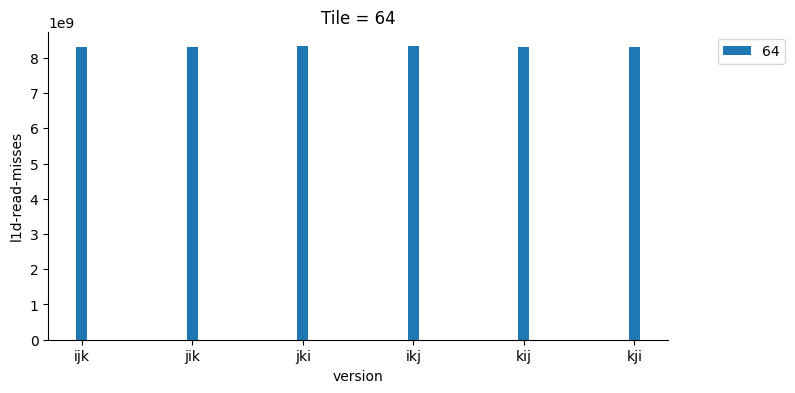

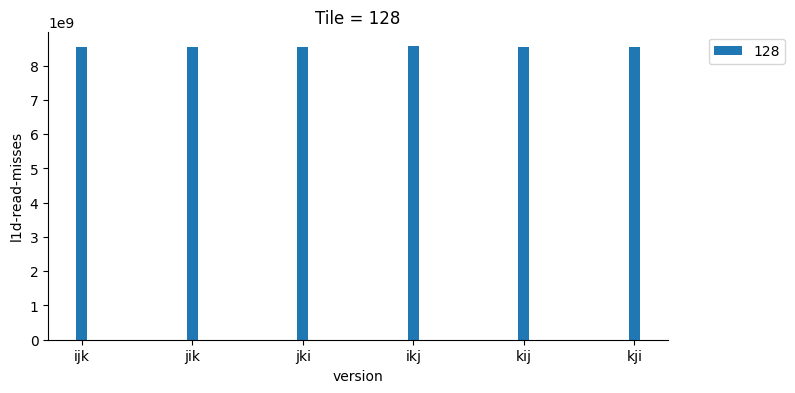

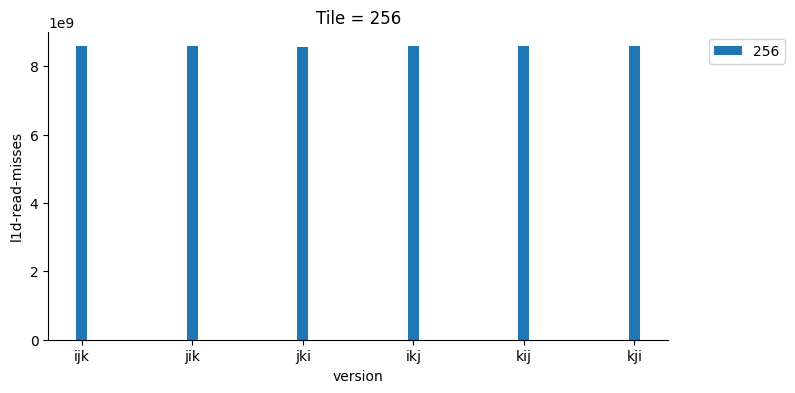

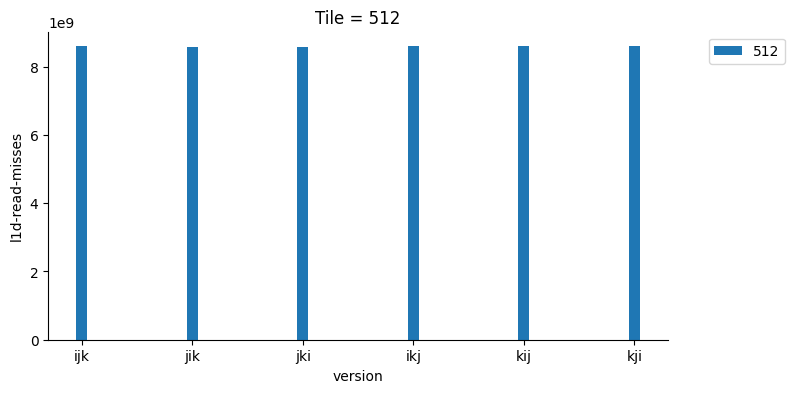

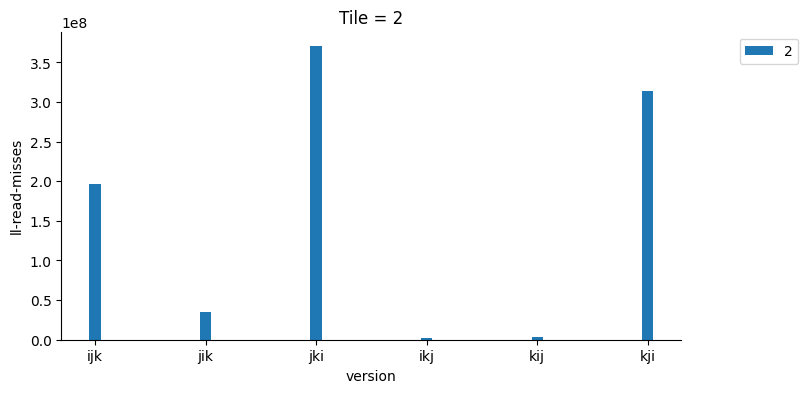

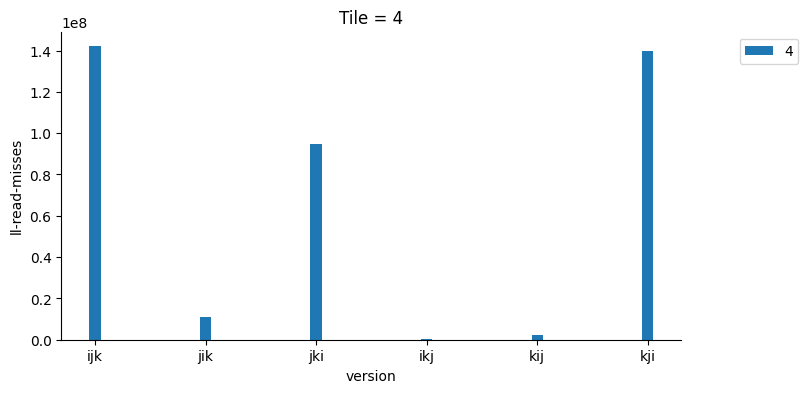

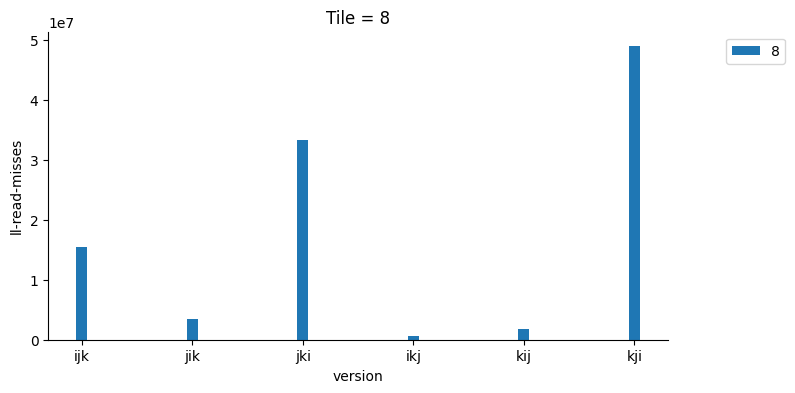

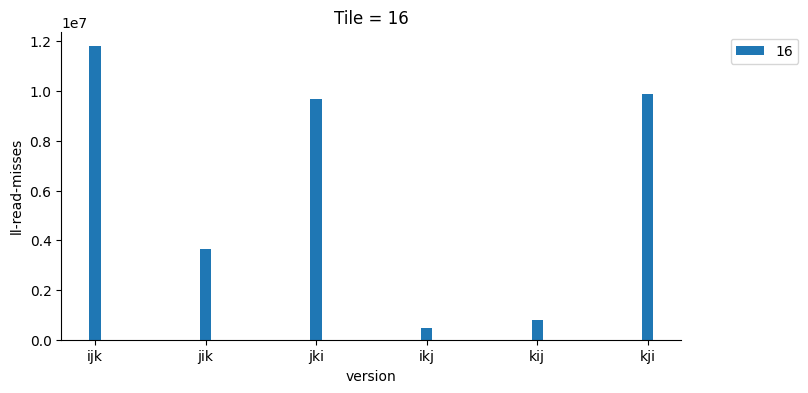

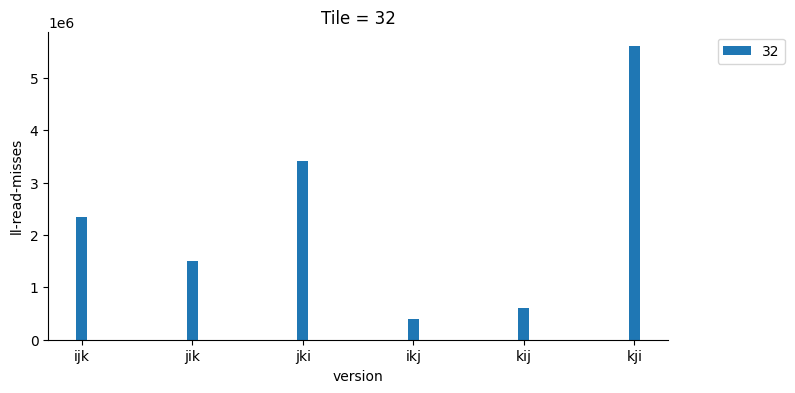

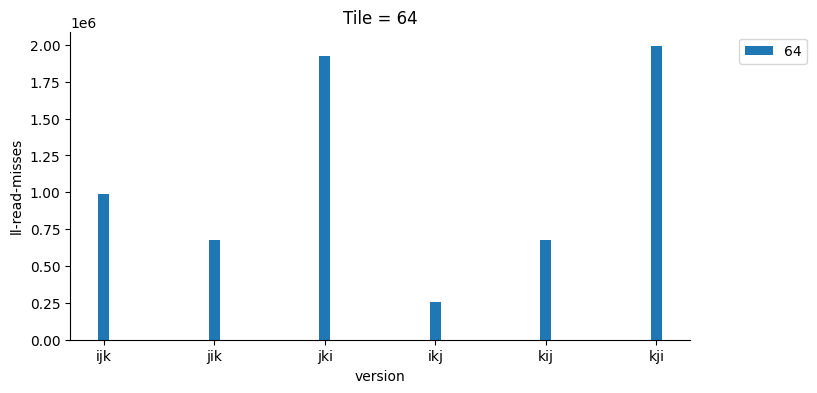

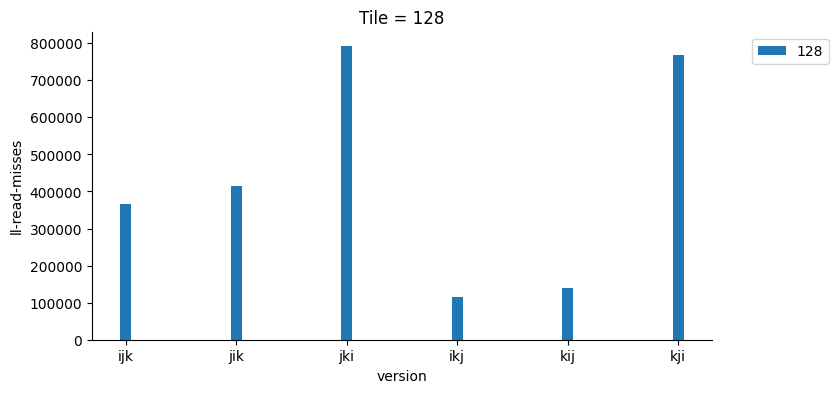

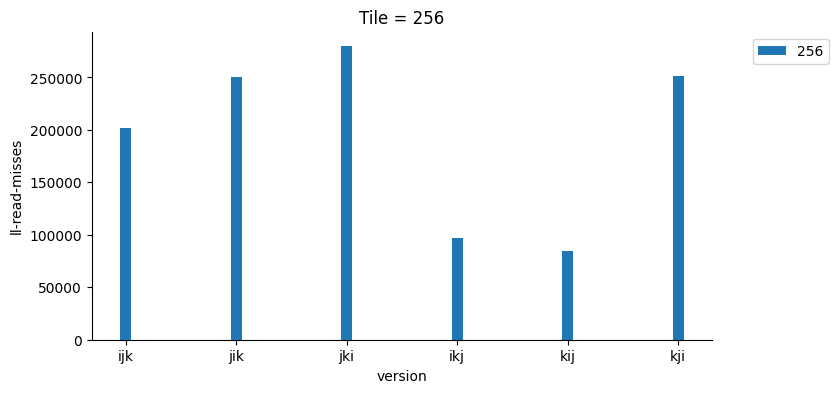

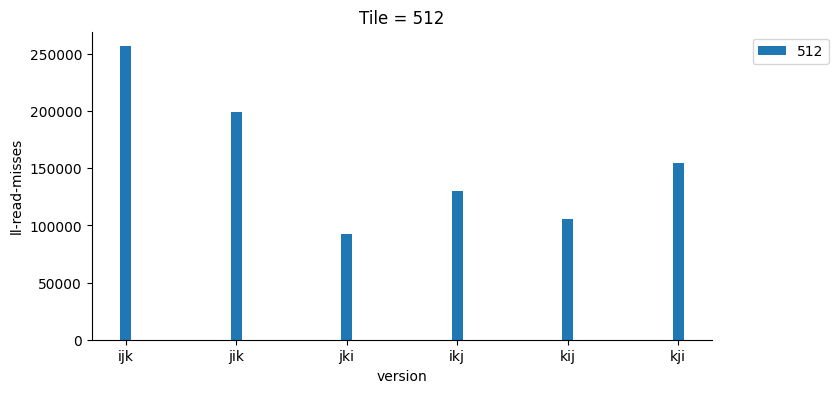

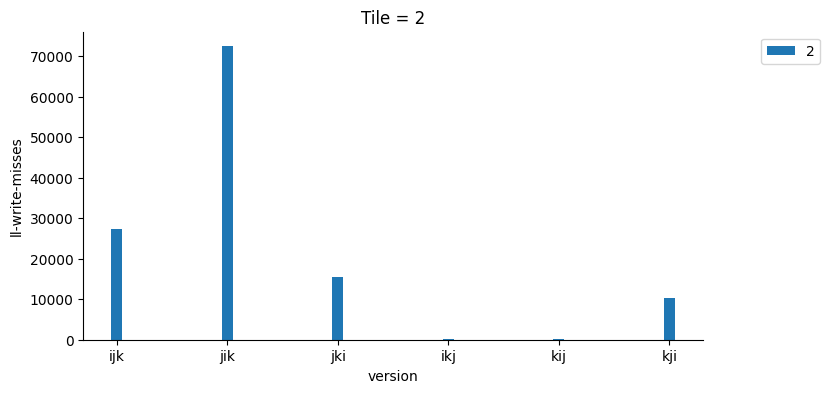

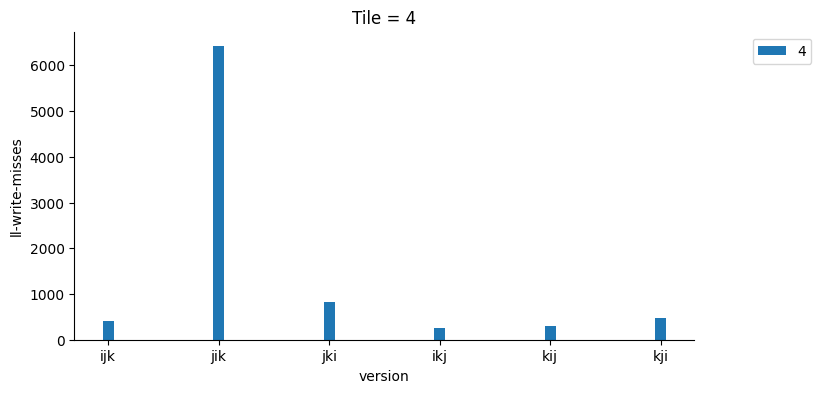

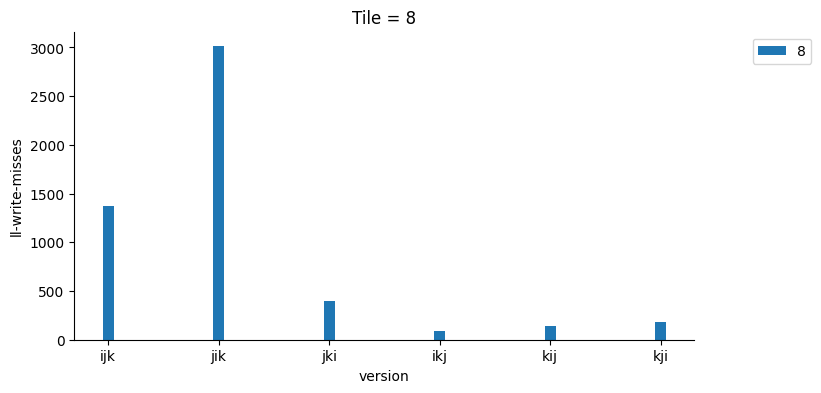

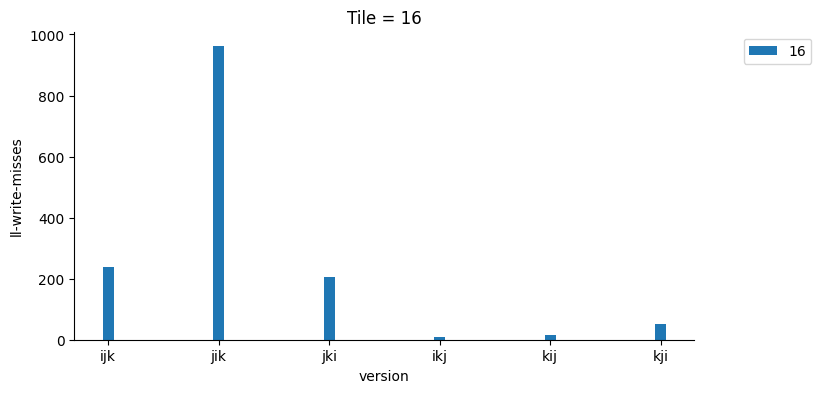

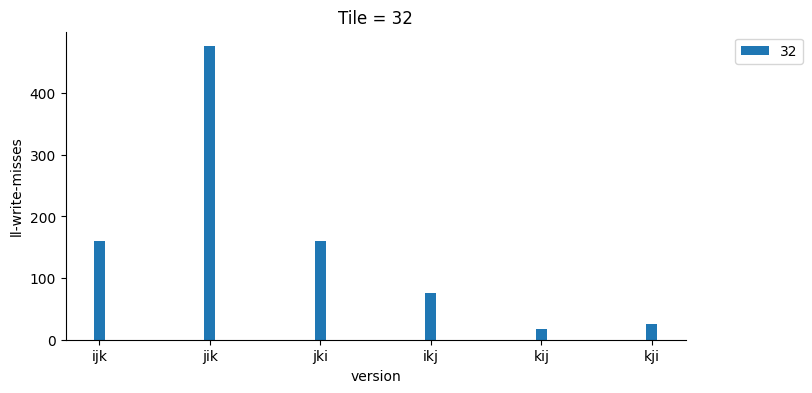

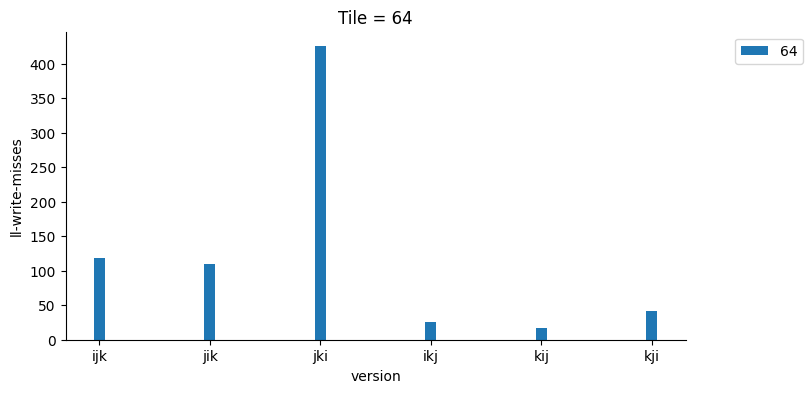

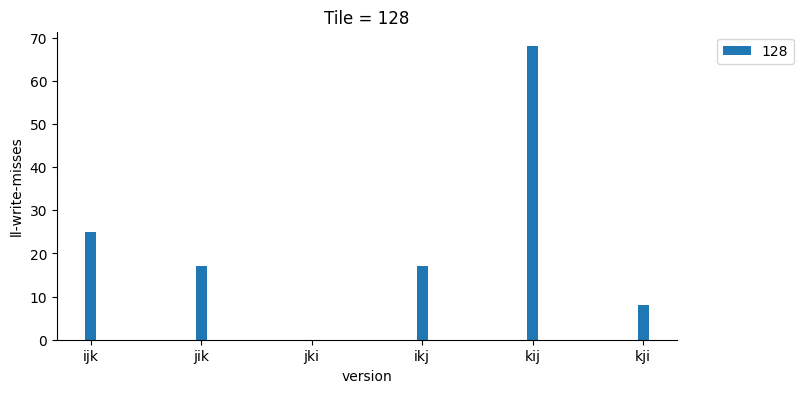

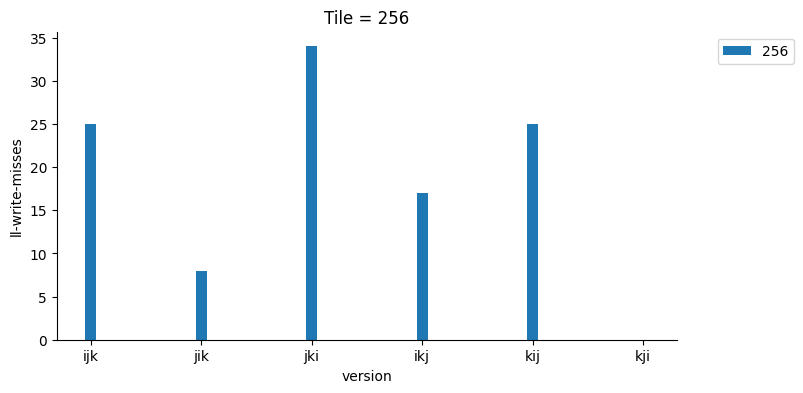

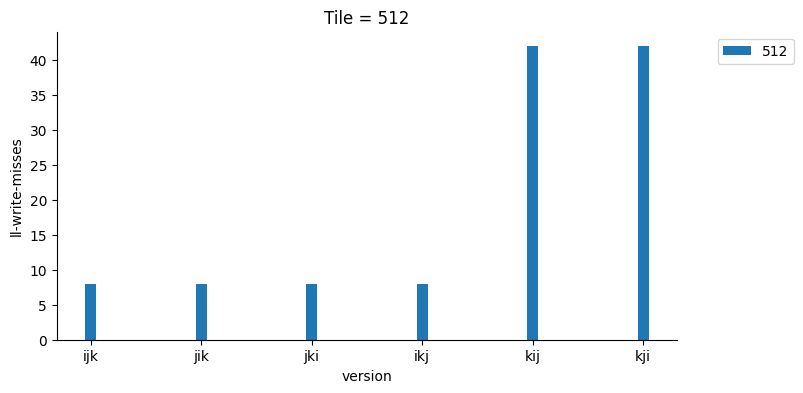

In [46]:
parameter = "ll-read-misses"
for parameter in ["l1d-read-misses","ll-read-misses","ll-write-misses"]:
    for ind,tile in enumerate(all_tiles):
        fig = plt.figure(figsize=(8,4))
        ax = fig.gca()
        df_tile = query(df, tiles=[tile], mat=[2048])
        ax.bar(np.array(df_tile["version"]), df_tile[parameter], width=0.1, label=tile)
        ax.set_title("Tile = " + str(tile))
        ax.set_xticklabels(version_ticks)
        ax.set_ylabel(parameter)
        ax.set_xlabel("version")
    #     ax.set_title(parameter)
        sns.despine()
        plt.legend(bbox_to_anchor=(1.2,1))

## Tiles on x-axis

/tmp/ipykernel_18391/1220573769.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([""] + list(np.logspace(2,9, base=2,num=8)) +[""])
/tmp/ipykernel_18391/1220573769.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([""] + list(np.logspace(2,9, base=2,num=8)) +[""])
/tmp/ipykernel_18391/1220573769.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(8,4))


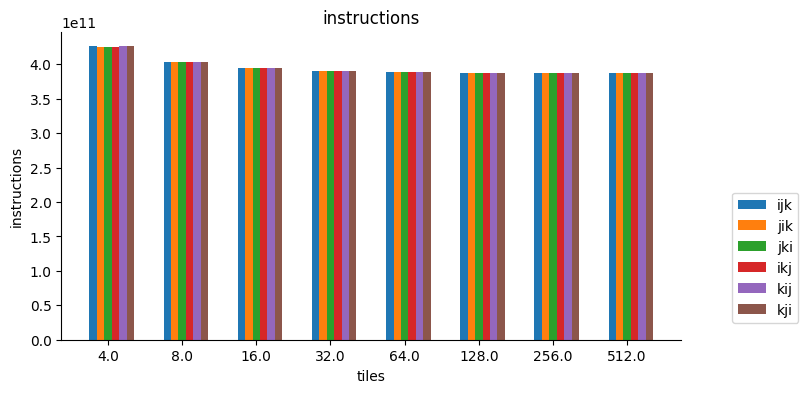

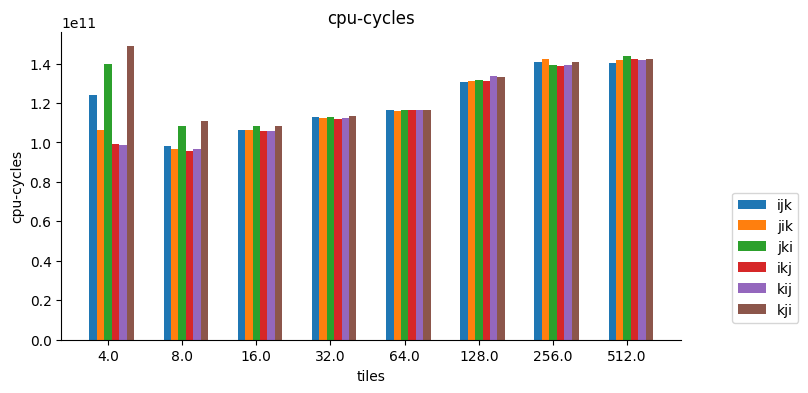

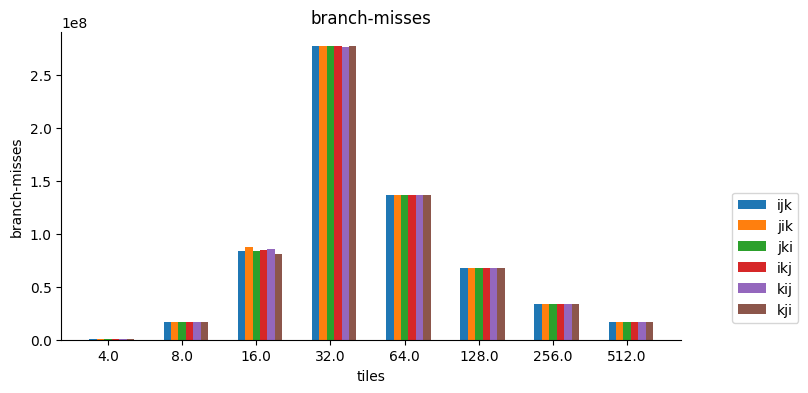

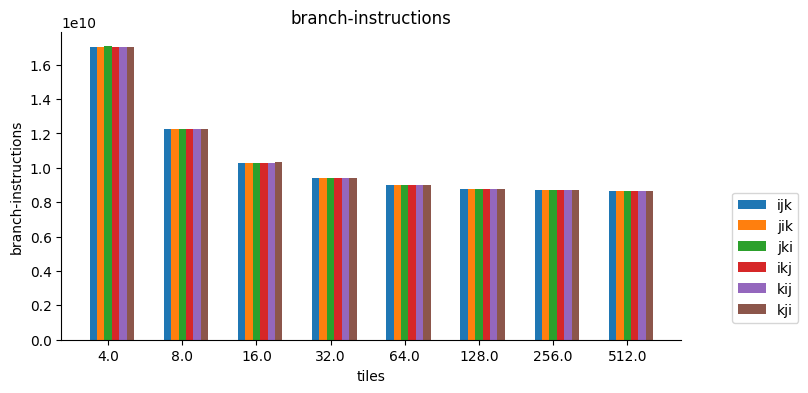

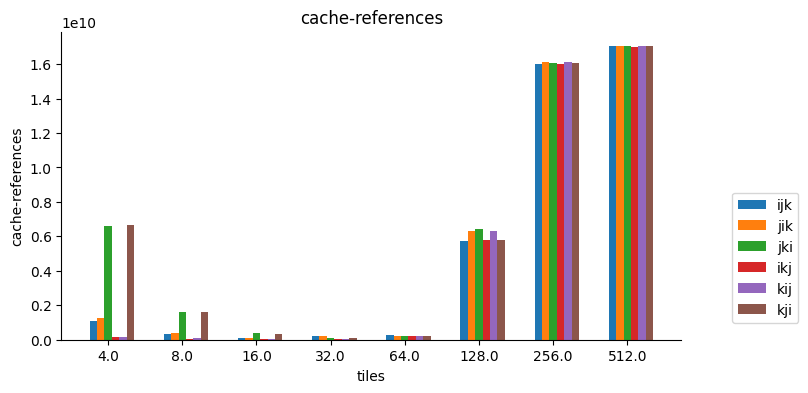

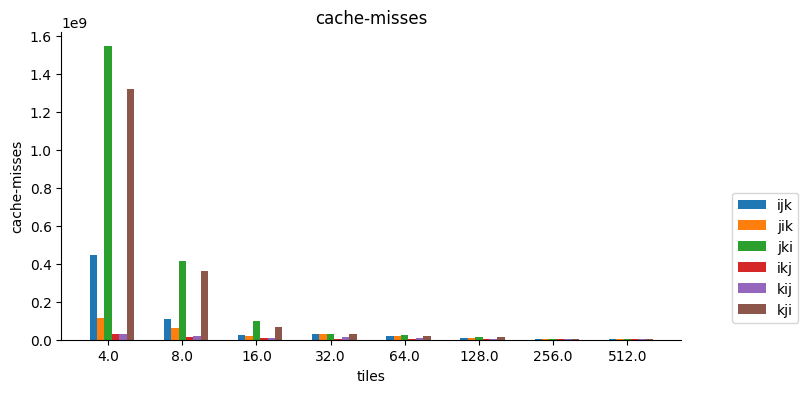

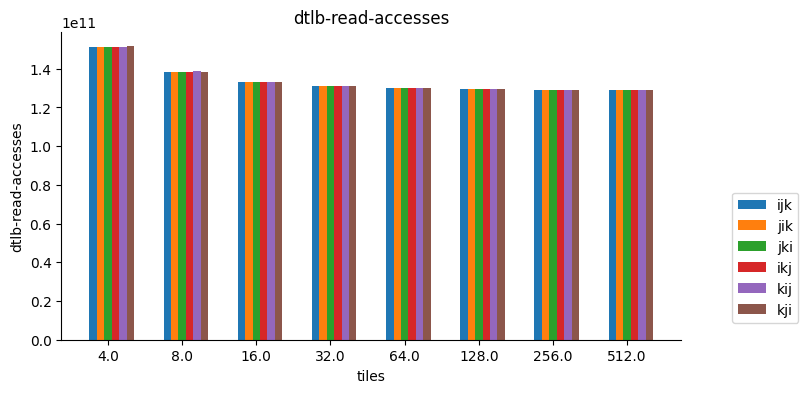

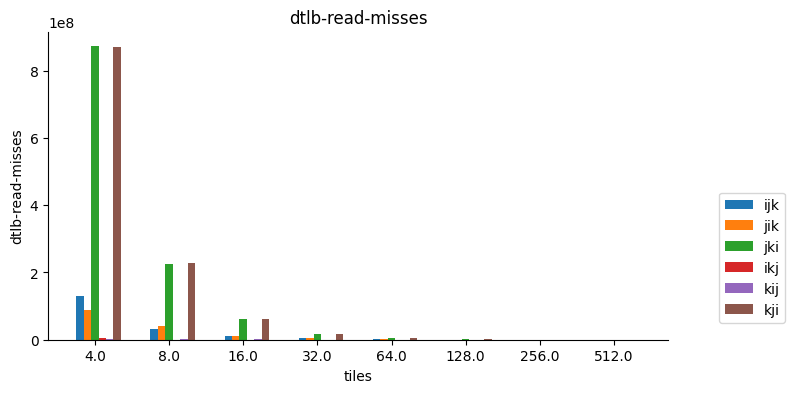

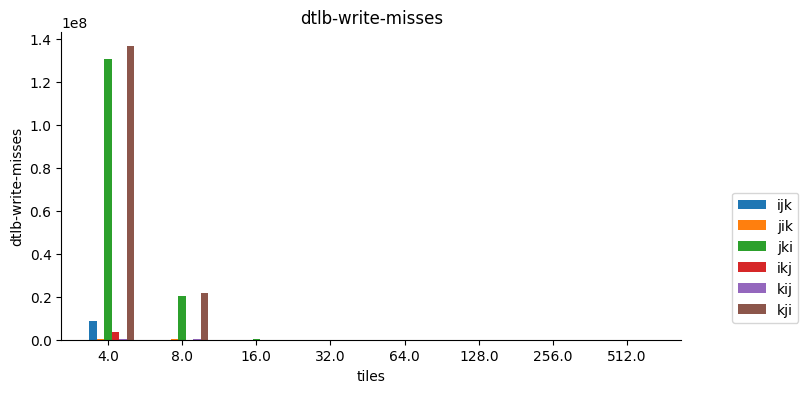

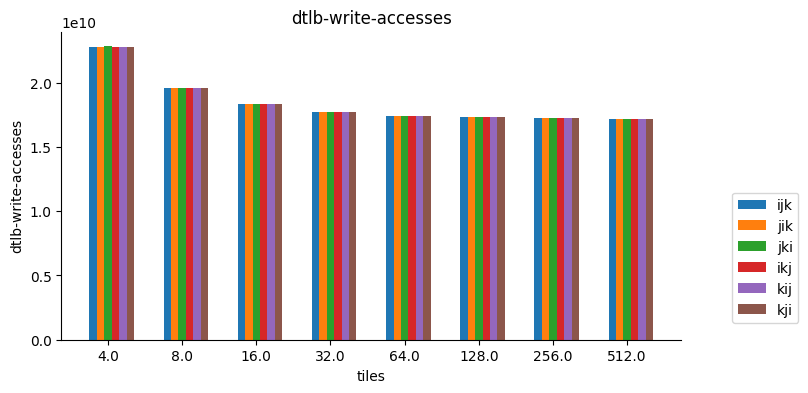

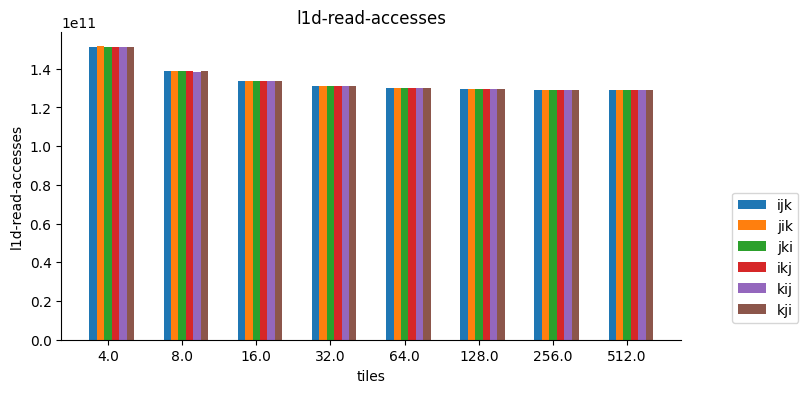

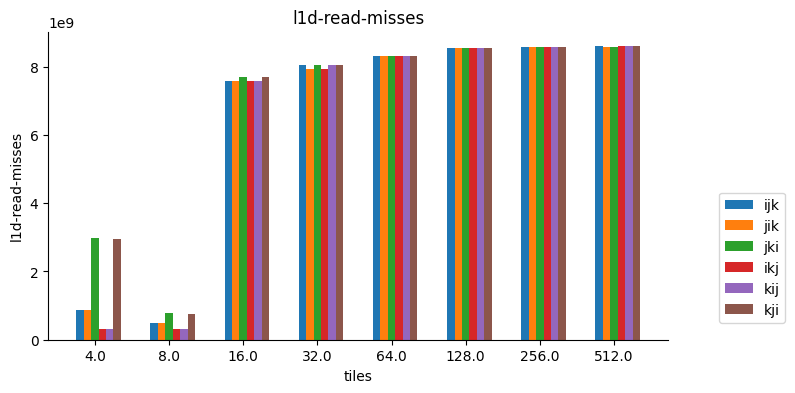

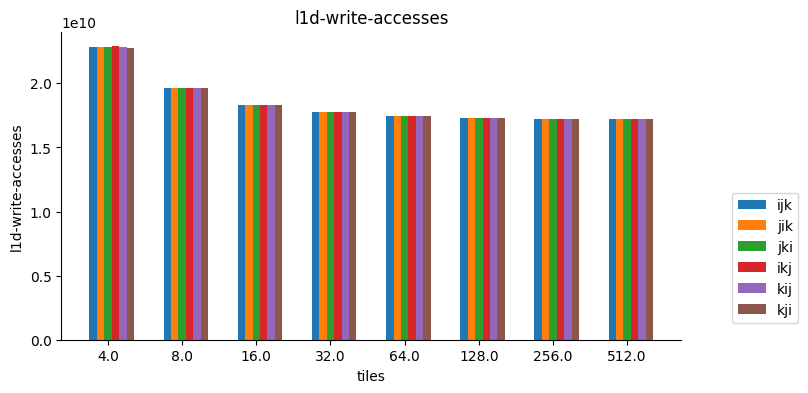

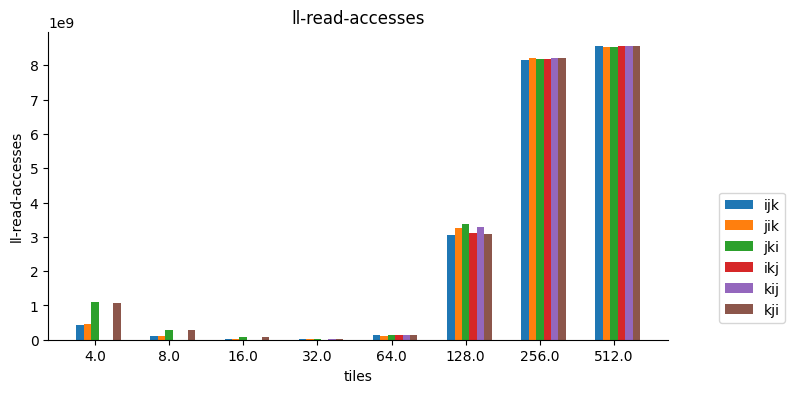

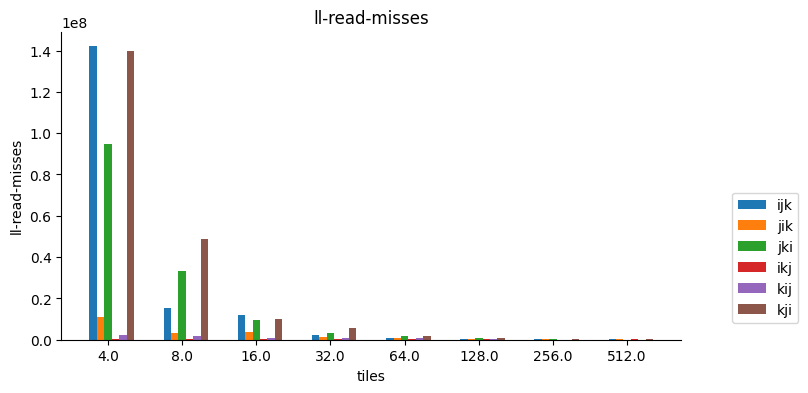

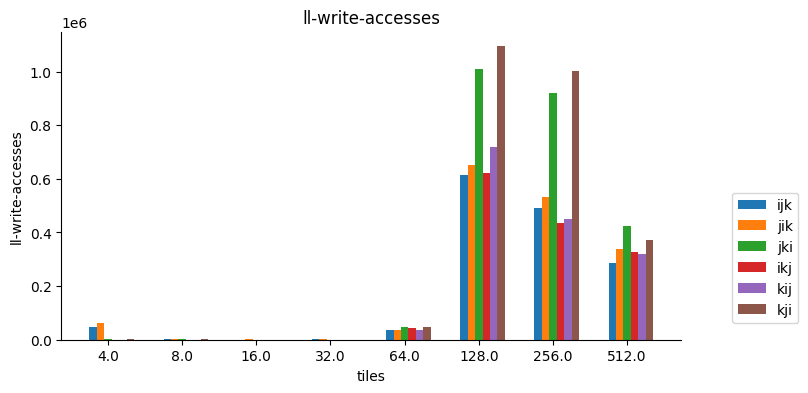

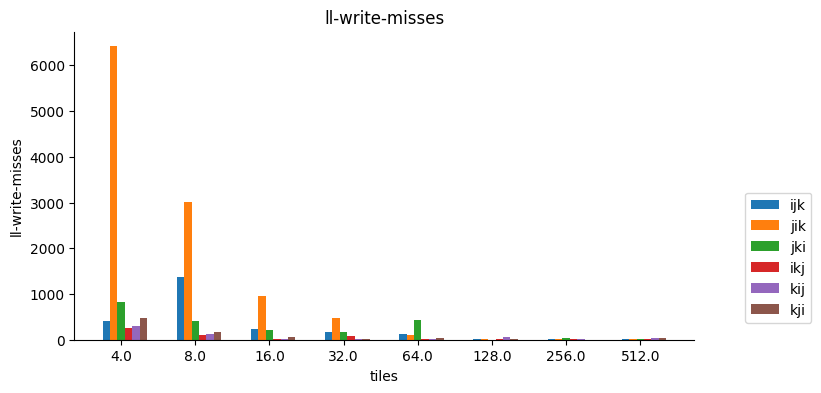

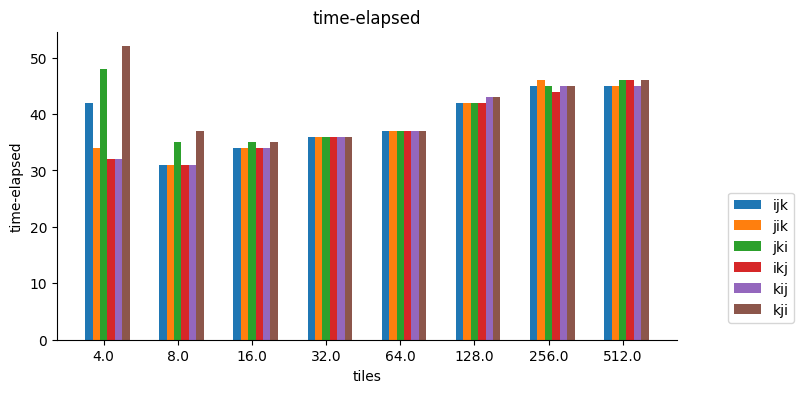

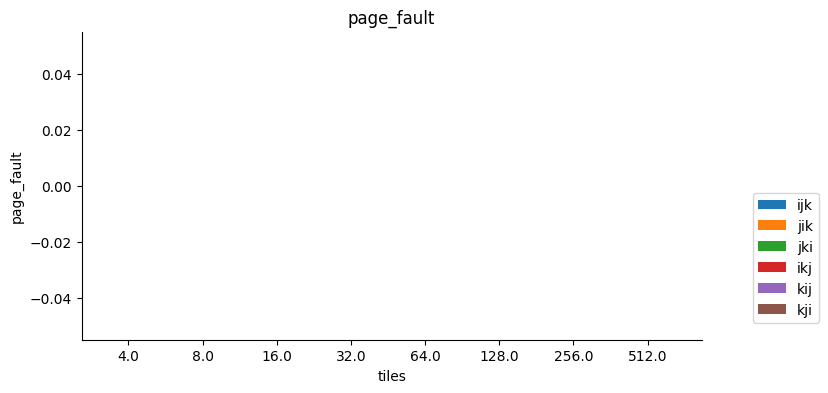

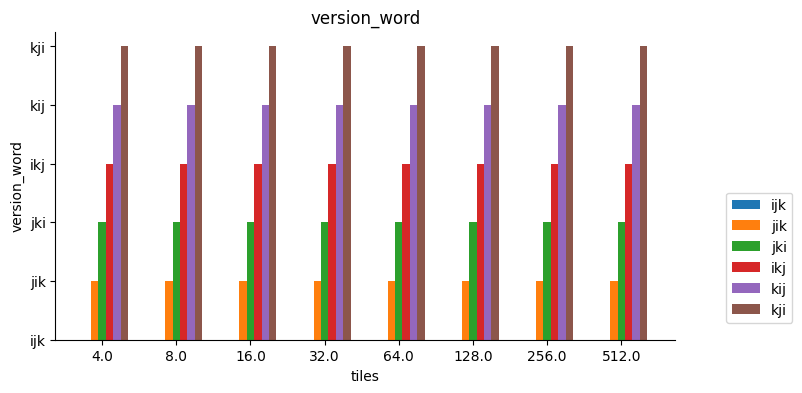

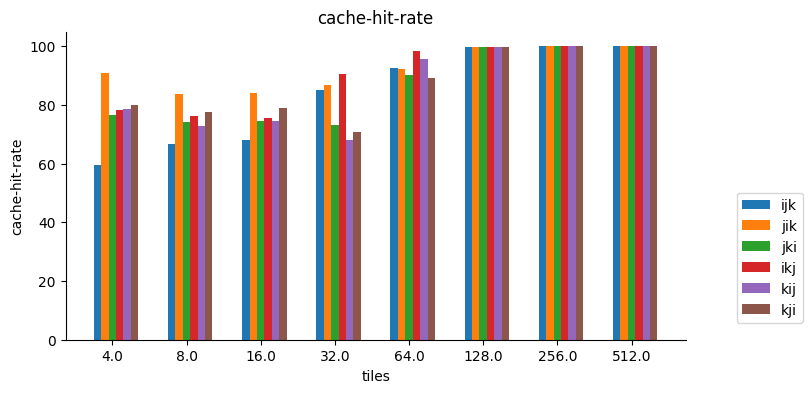

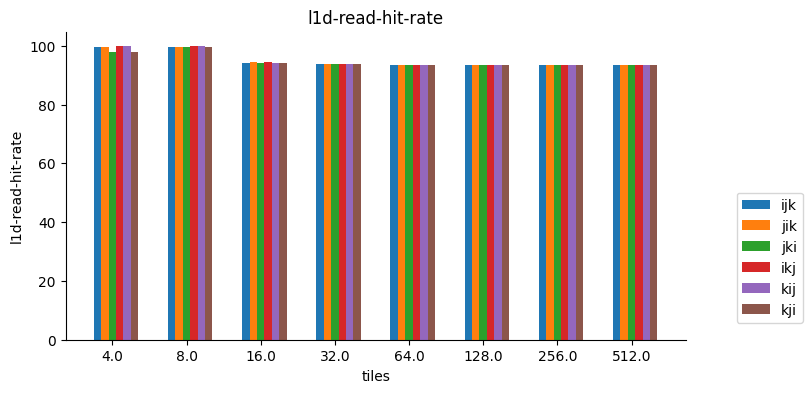

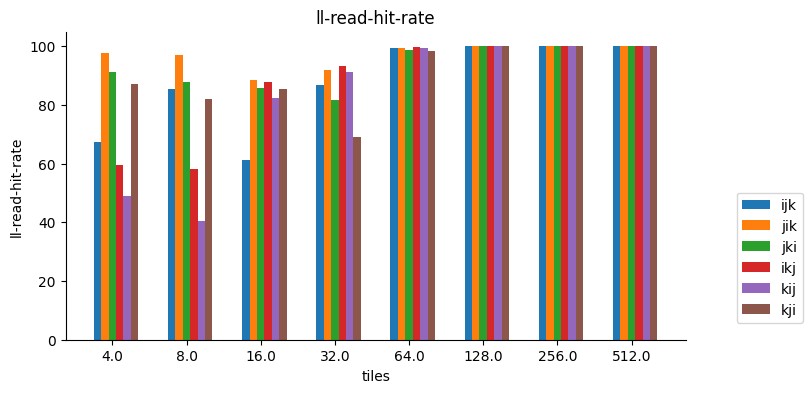

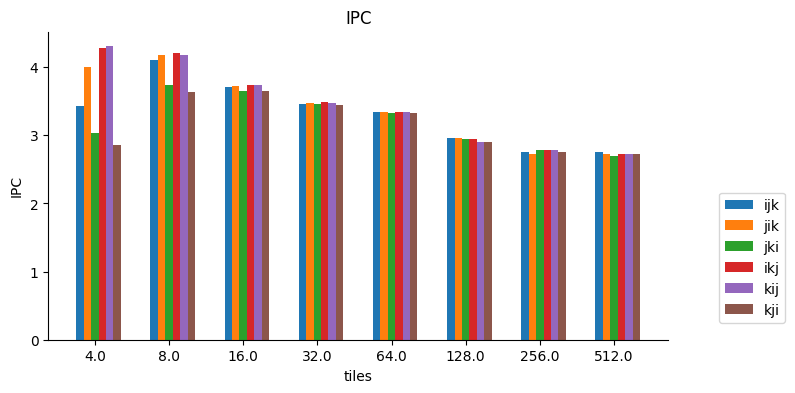

In [49]:
for parameter in df_2048.columns[3:]:
    fig = plt.figure(figsize=(8,4))
    ax = fig.gca()
    for ver in range(1,7):
        df_tile = query(df, versions=[ver], tiles=[4,8,16,32,64,128,256,512], mat=[2048])
        ax.bar(np.array(np.log2(df_tile["tile_size"]))+0.1*(ver-3), df_tile[parameter], width=0.1, label=version_mapping[ver])
        
    ax.set_ylabel(parameter)
    ax.set_xlabel("tiles")
    ax.set_xticklabels([""] + list(np.logspace(2,9, base=2,num=8)) +[""])
    ax.set_title(parameter)
    sns.despine()
    plt.legend(bbox_to_anchor=(1.2,0.5))

In [13]:
np.logspace(2,9, base=2,num=8)

array([  4.,   8.,  16.,  32.,  64., 128., 256., 512.])

/tmp/ipykernel_108144/3801509320.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,3))


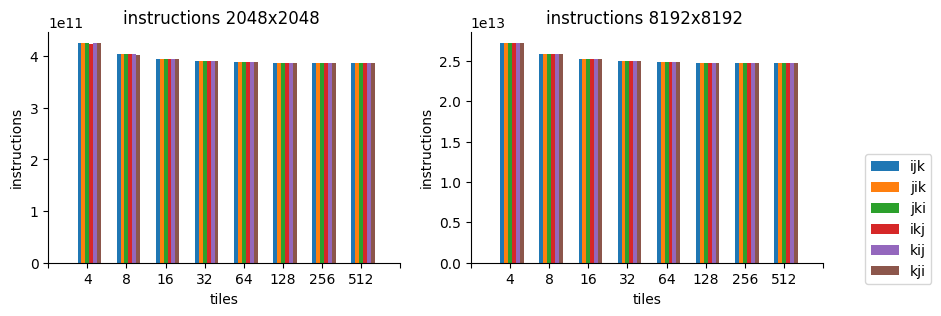

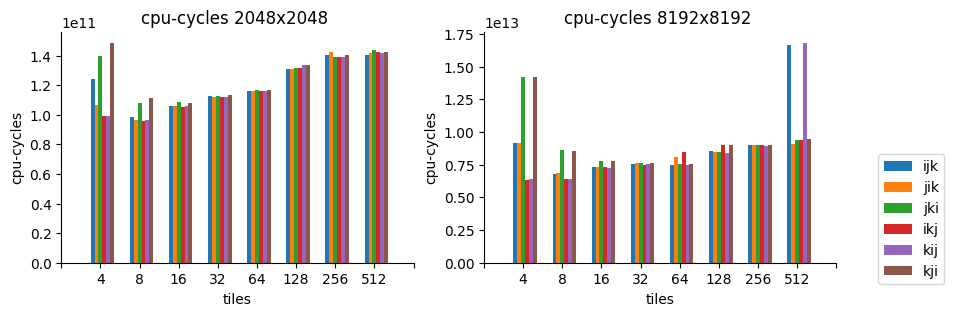

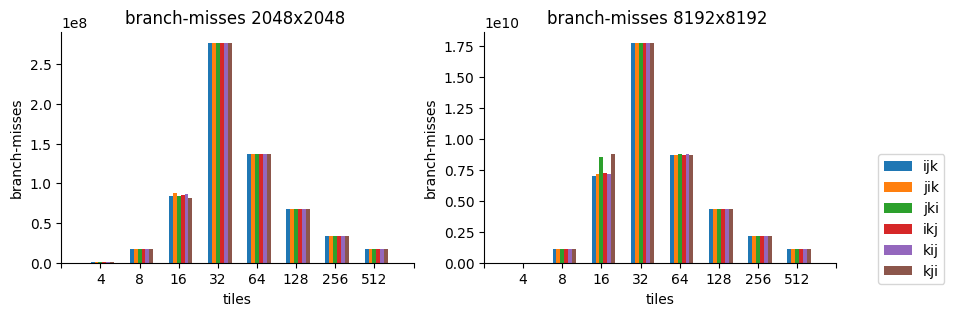

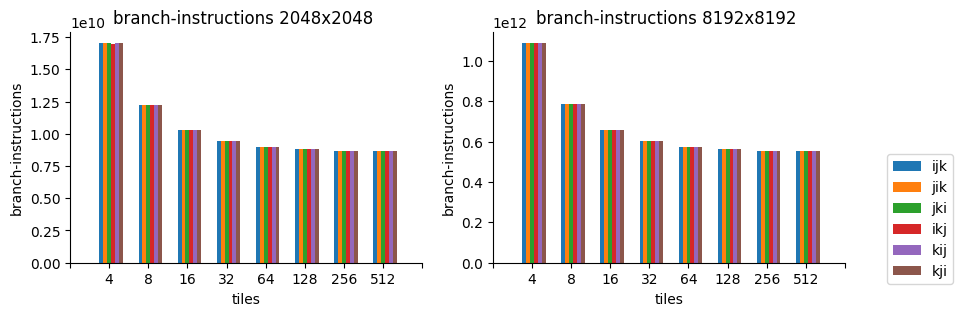

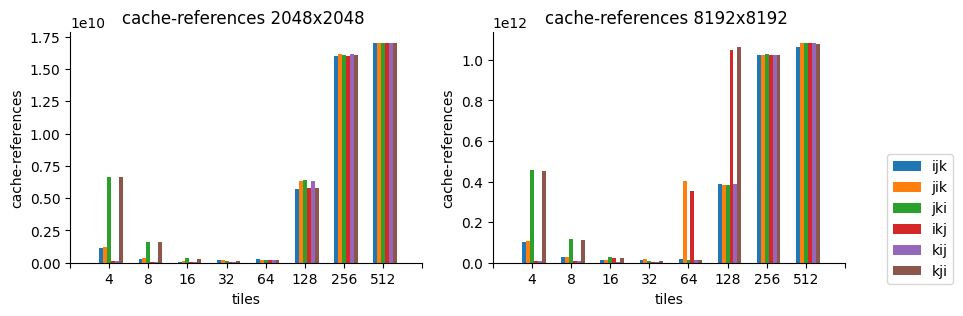

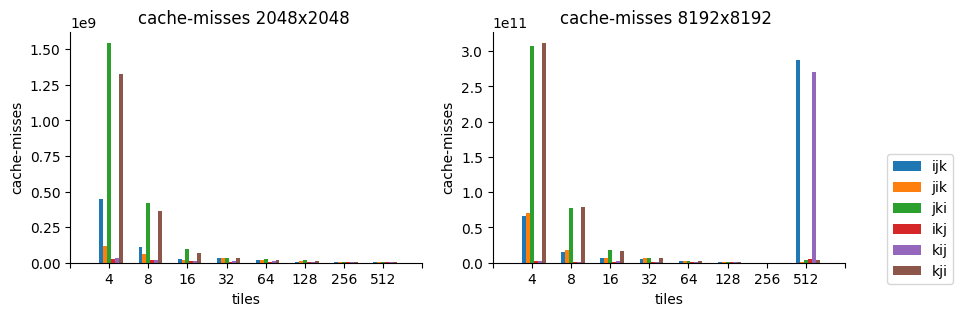

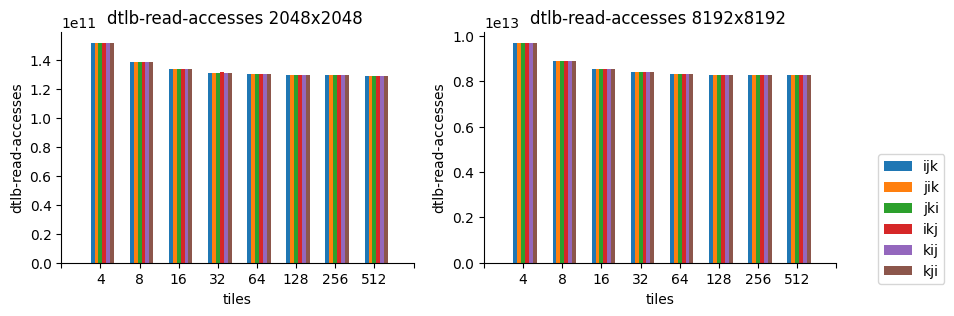

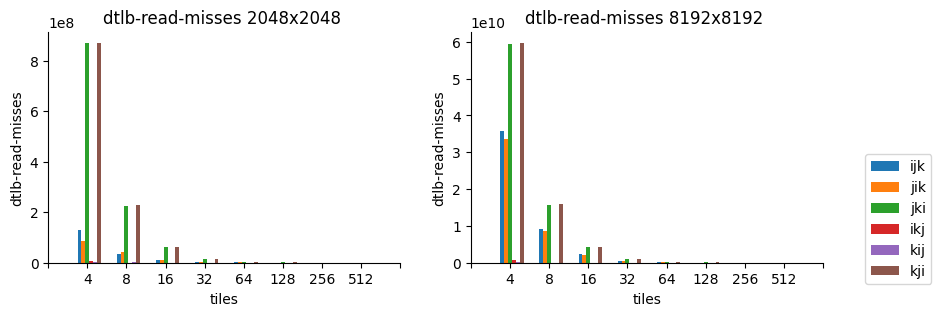

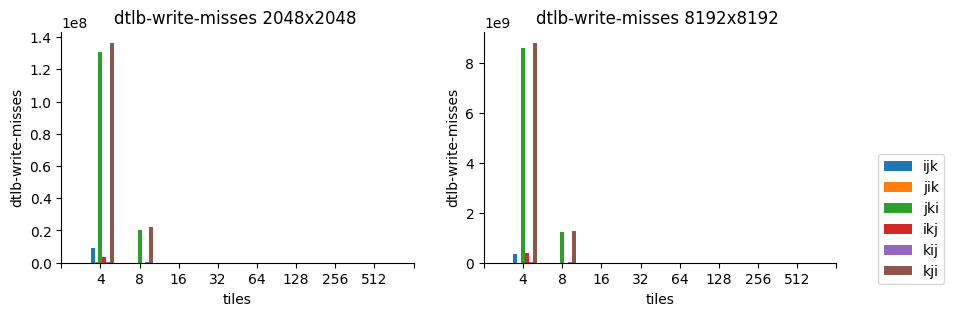

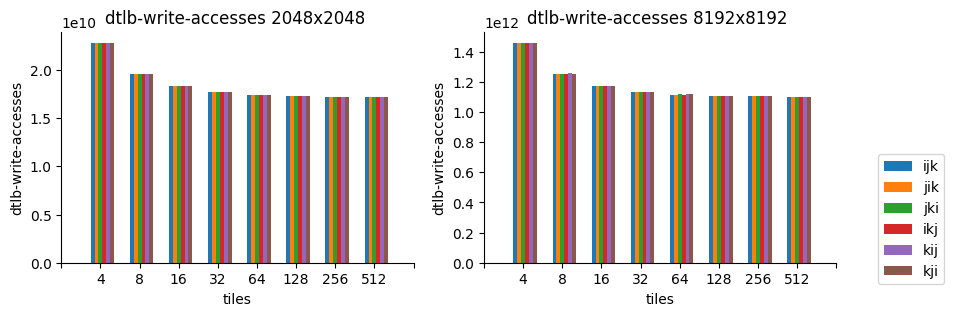

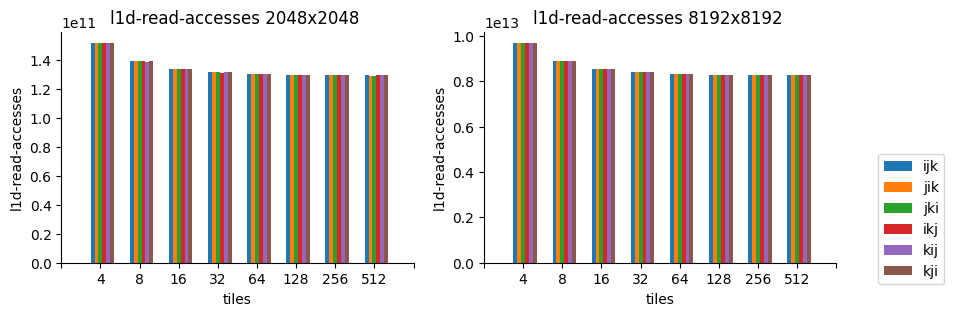

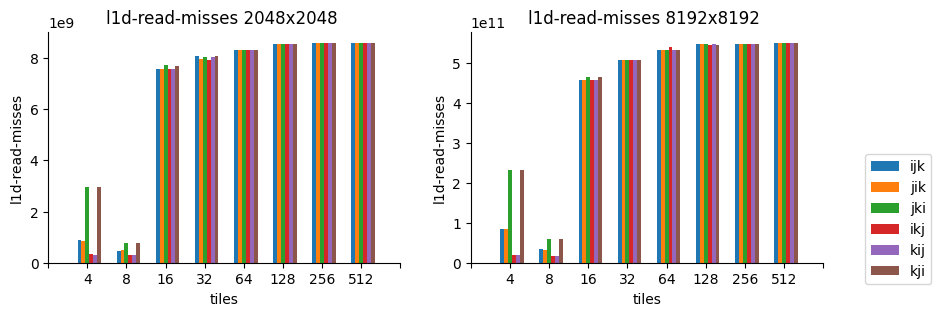

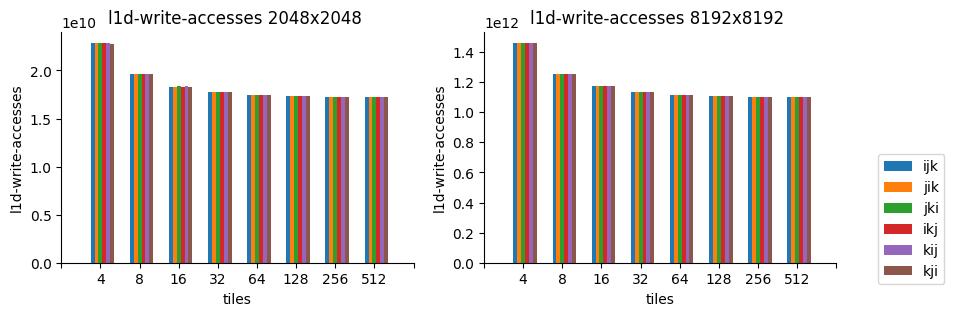

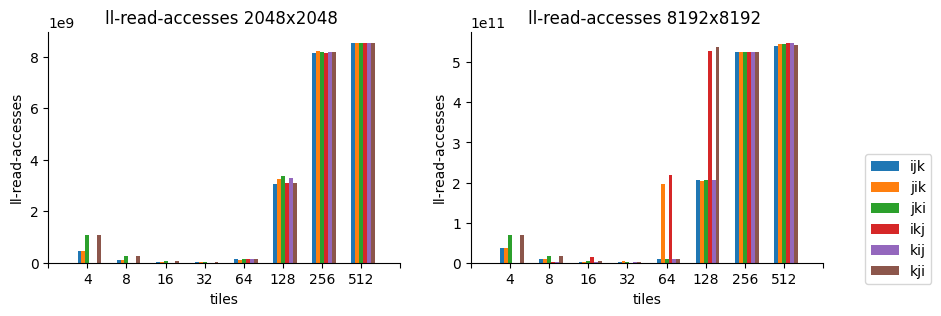

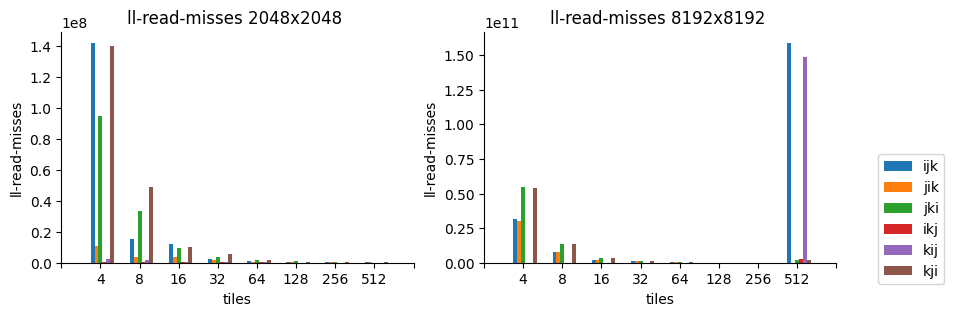

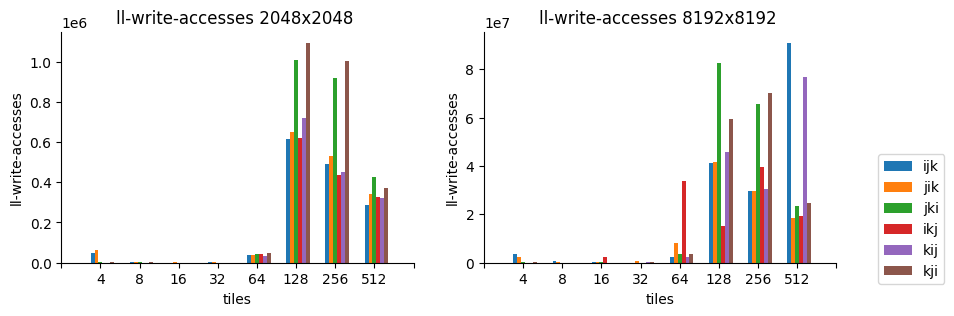

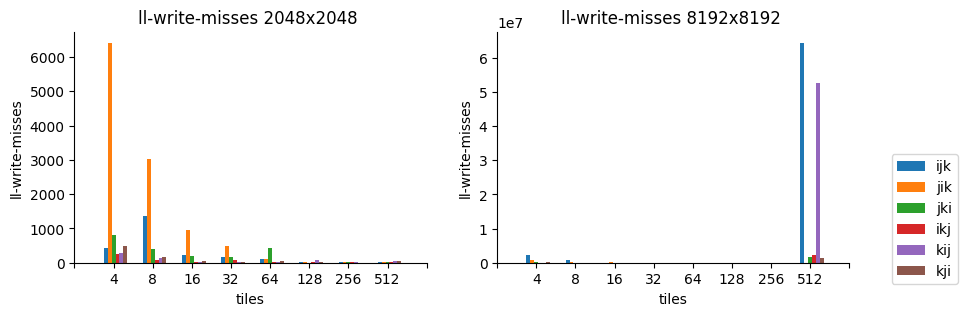

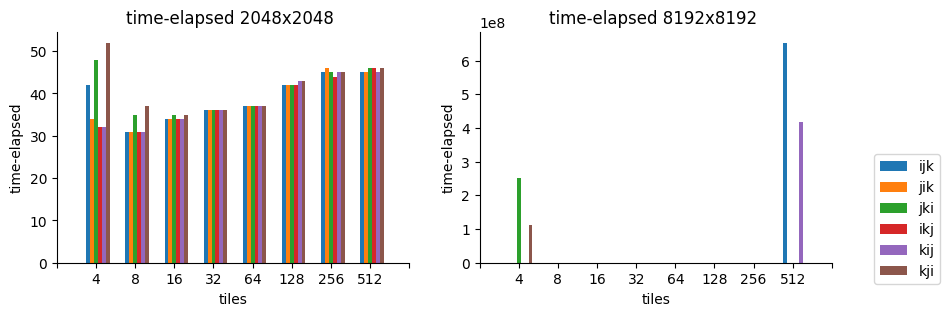

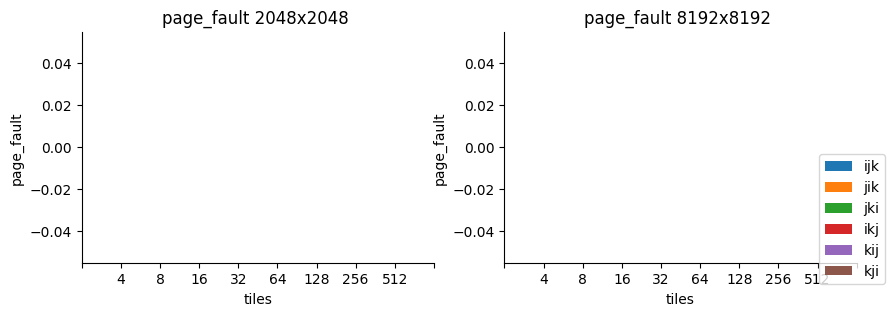

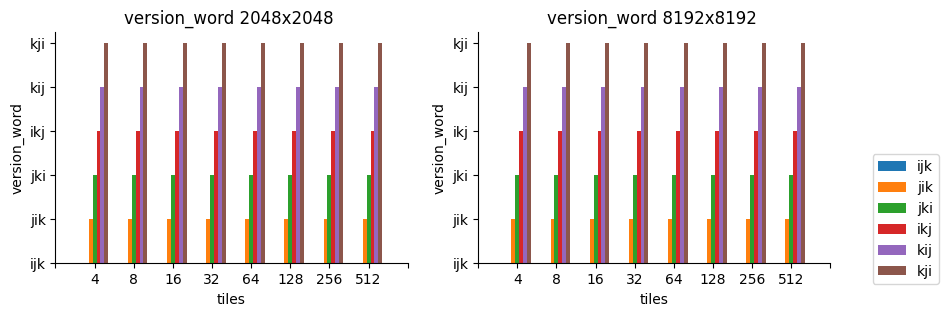

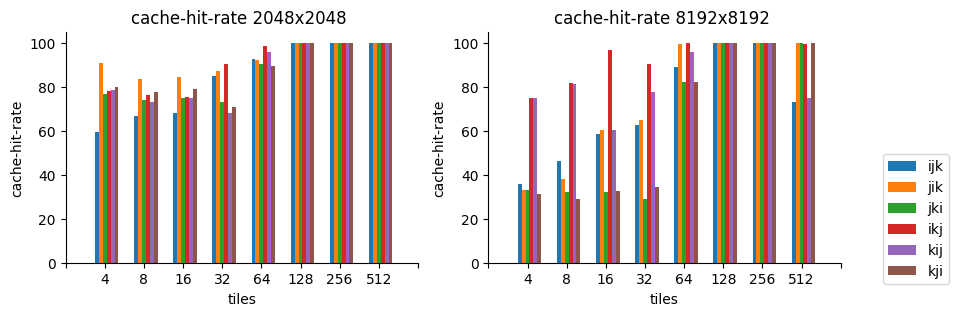

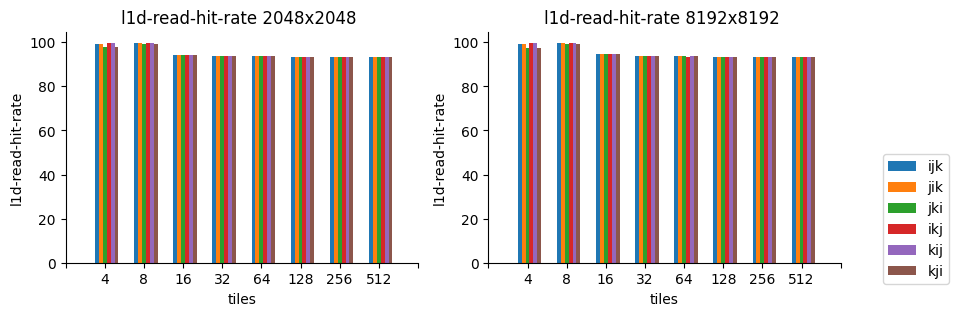

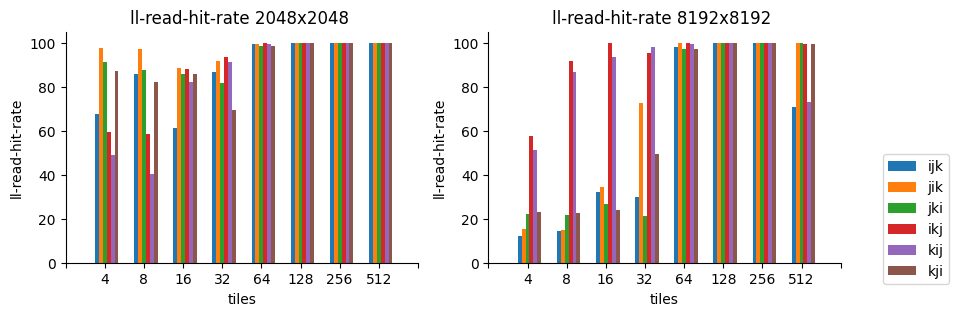

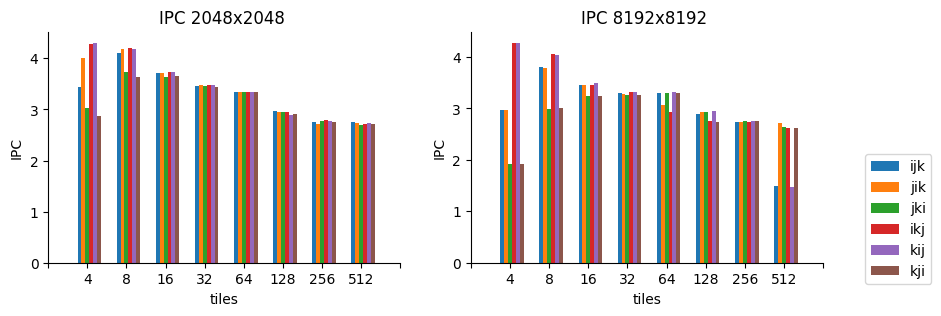

In [18]:
def plot_parameter_tile(ax, parameter, mat):
    for ver in range(1,7):
        df_tile = query(df, versions=[ver], mat=[mat])
        ax.bar(np.array(np.log2(df_tile["tile_size"]))+0.1*(ver-3), df_tile[parameter], width=0.1, label=version_mapping[ver])
        
    ax.set_ylabel(parameter)
    ax.set_xlabel("tiles")
    ax.set_xticks(range(1,11))
    ax.set_xticklabels([""] + list(map(int,np.logspace(2,9, base=2,num=8))) +[""])
    ax.set_title(parameter + f" {mat}x{mat} ")
    sns.despine()
    
    
for parameter in df.columns[3:]:
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,3))
    plot_parameter_tile(ax1, parameter, 2048)
    plot_parameter_tile(ax2, parameter, 8192)
    plt.legend(bbox_to_anchor=(1.1,0.5))

/tmp/ipykernel_548904/51602891.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([""] + list(np.logspace(1,9, base=2,num=9)) +[""])


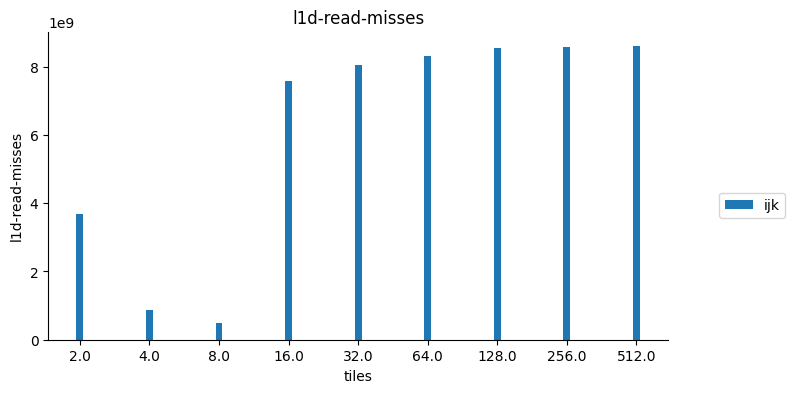

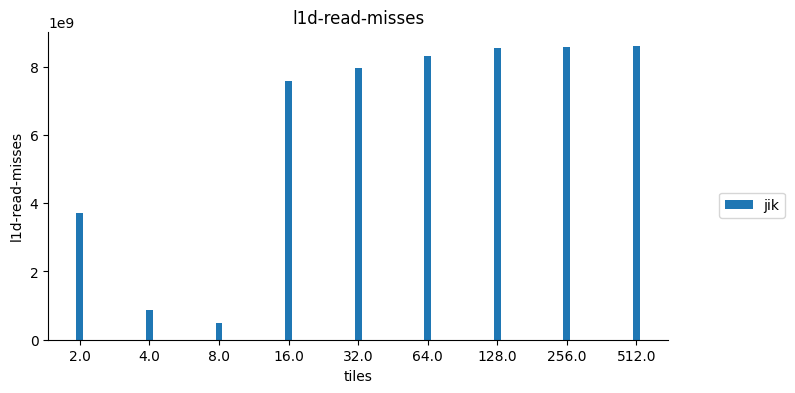

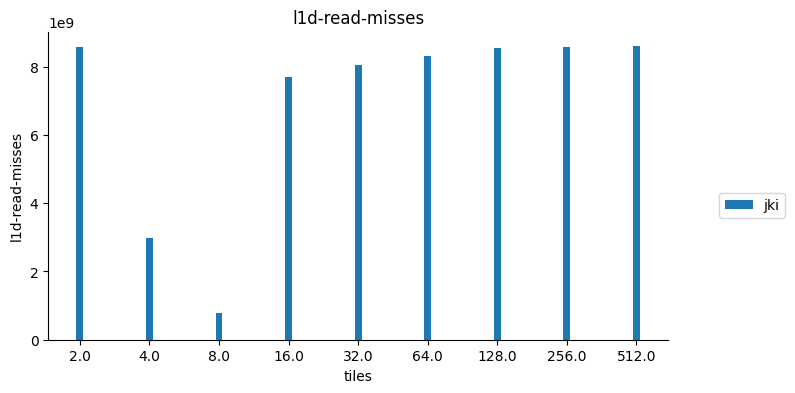

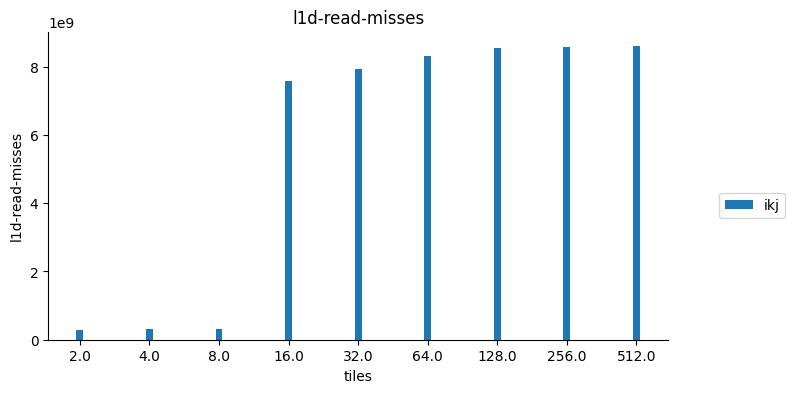

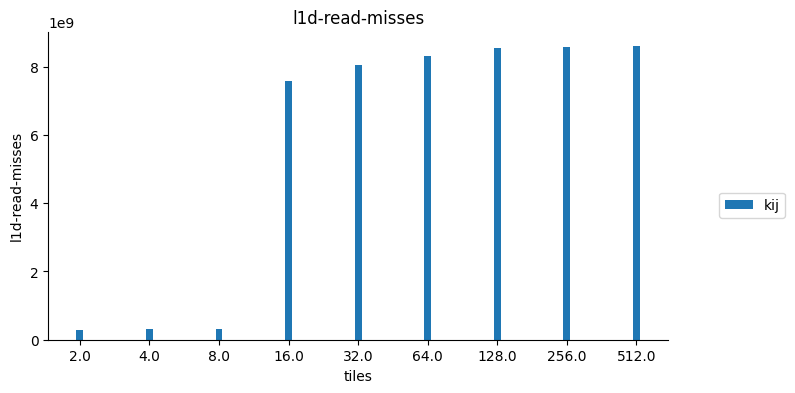

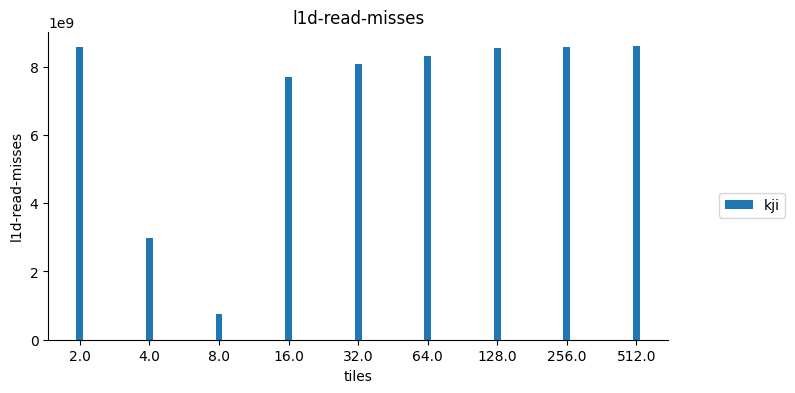

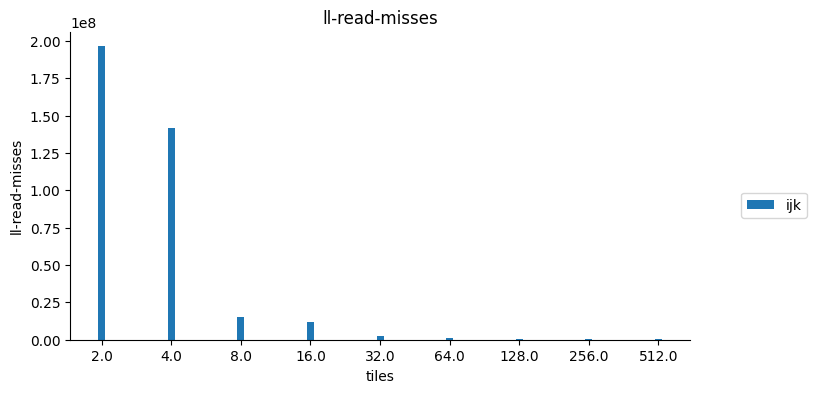

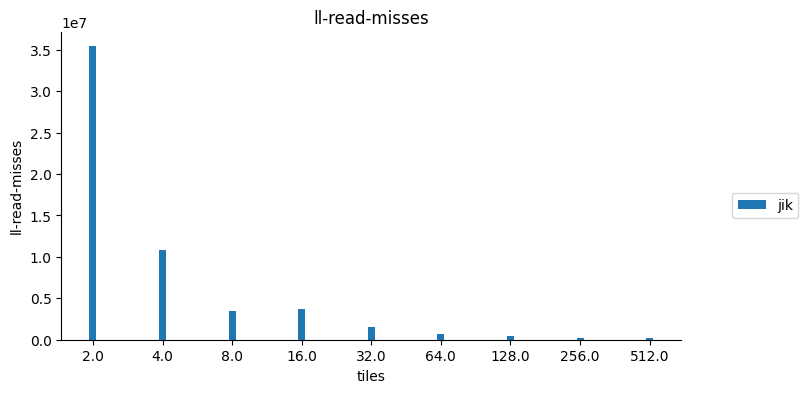

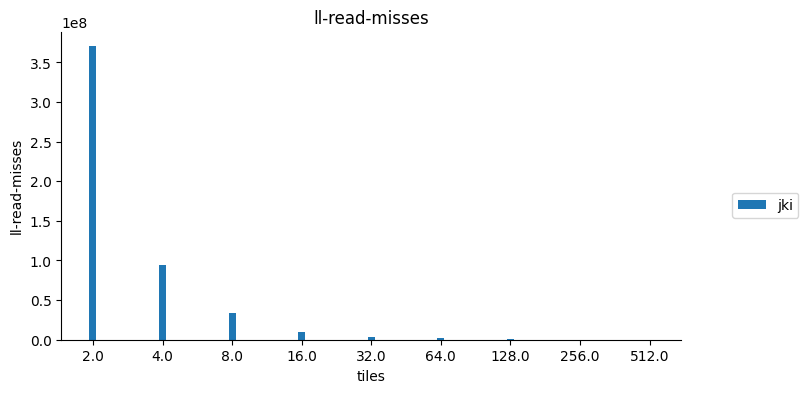

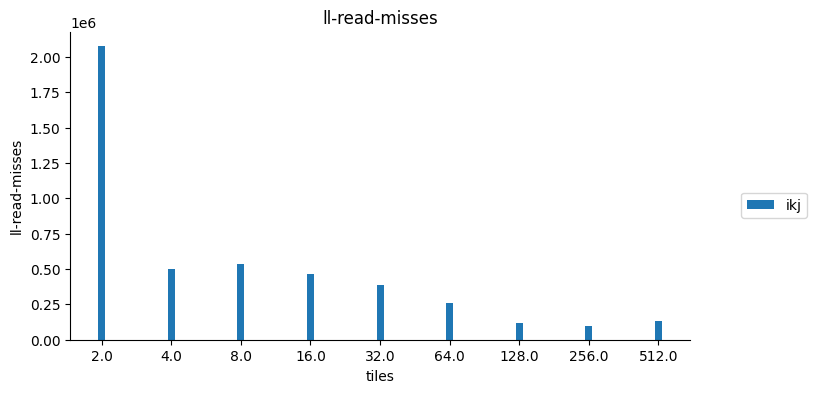

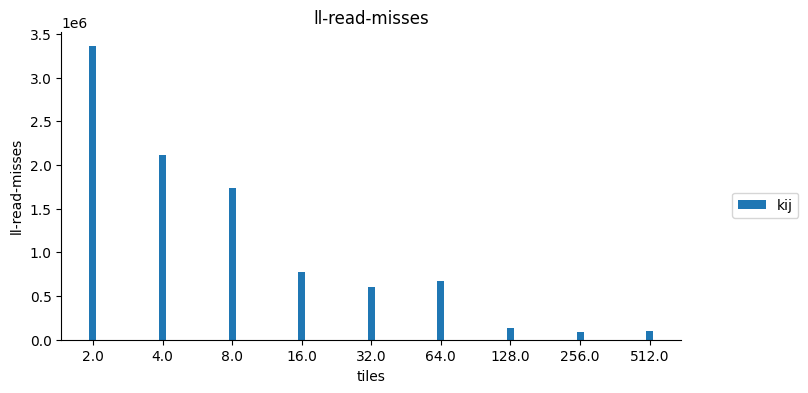

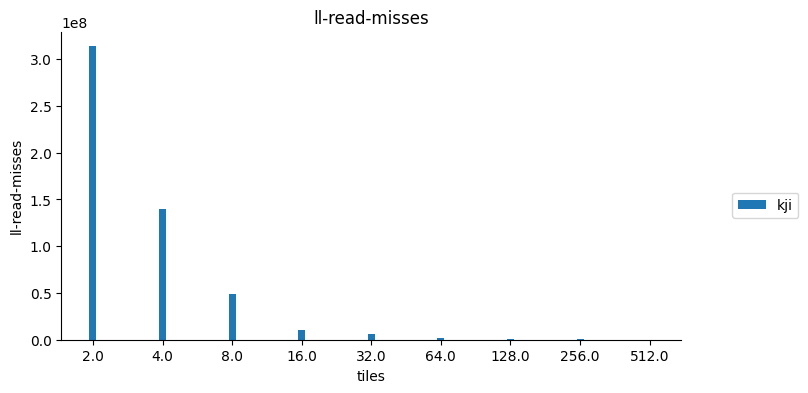

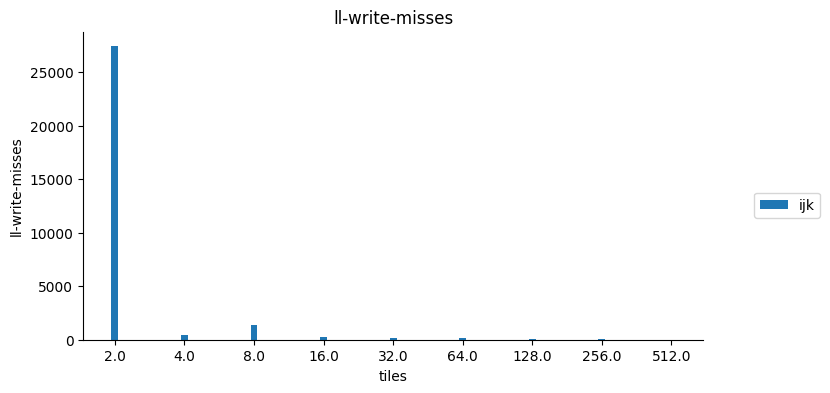

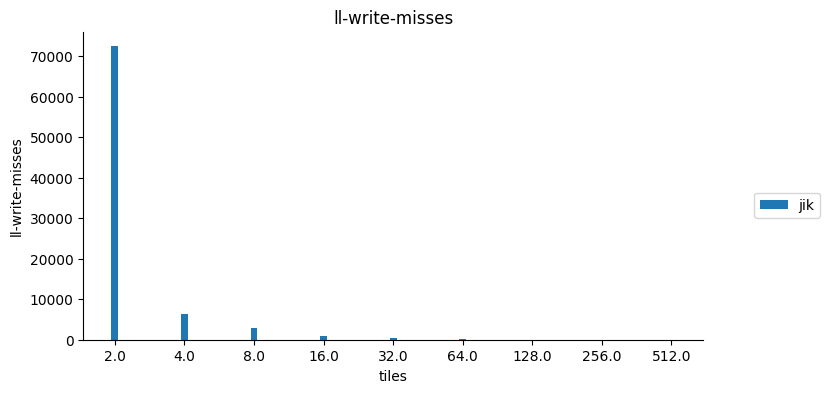

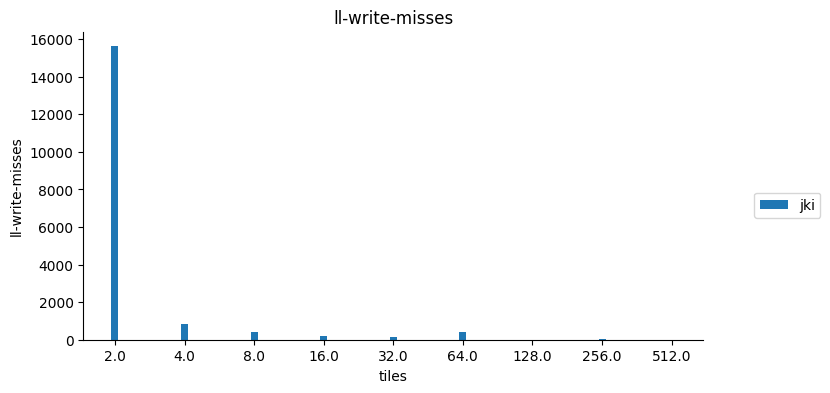

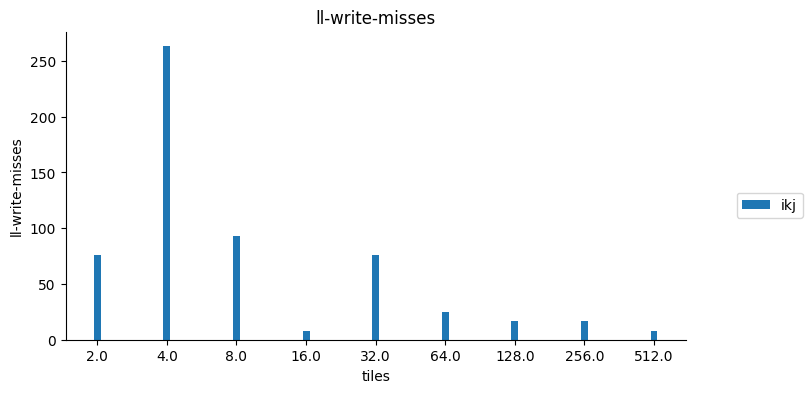

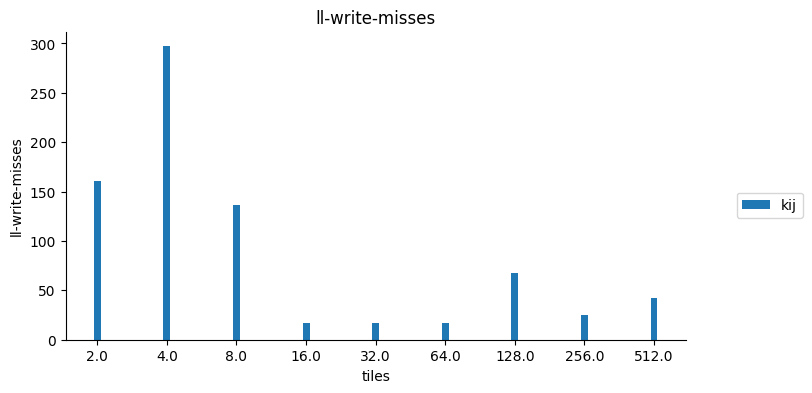

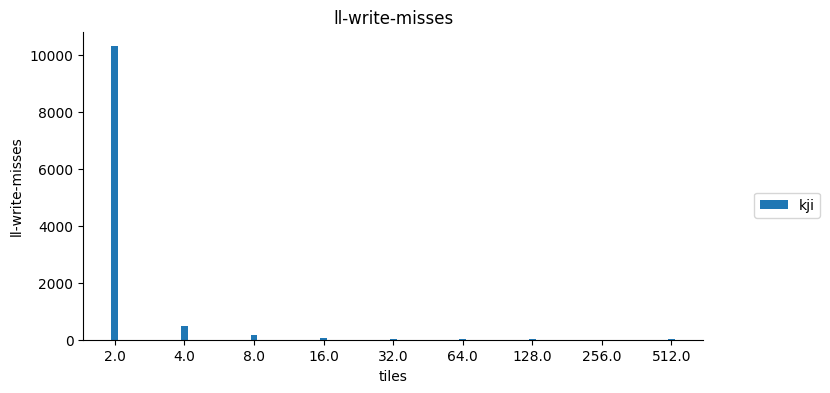

In [85]:
for parameter in ["l1d-read-misses","ll-read-misses","ll-write-misses"]:
    for ver in range(1,7):
        fig = plt.figure(figsize=(8,4))
        ax = fig.gca()
        df_tile = query(df_2048, versions=[ver], tiles=all_tiles)
        ax.bar(np.array(np.log2(df_tile["tile_size"])), df_tile[parameter], width=0.1, label=version_mapping[ver])
        ax.set_ylabel(parameter)
        ax.set_xlabel("tiles")
        ax.set_xticklabels([""] + list(np.logspace(1,9, base=2,num=9)) +[""])
        ax.set_title(parameter)
        sns.despine()
        plt.legend(bbox_to_anchor=(1.2,0.5))

/tmp/ipykernel_548904/2092751495.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([""] + list(np.logspace(2,9, base=2,num=8)) +[""])


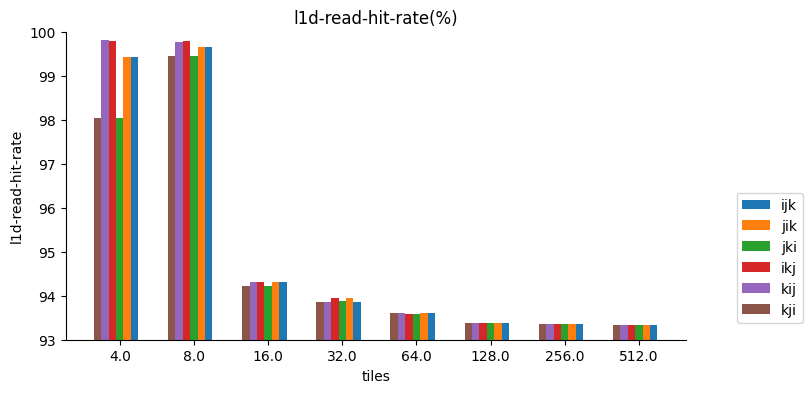

In [91]:
parameter = "l1d-read-hit-rate"
fig = plt.figure(figsize=(8,4))
ax = fig.gca()
for ver in range(1,7):
    df_tile = query(df_2048, versions=[ver], tiles=[4,8,16,32,64,128,256,512])
    ax.bar(np.array(np.log2(df_tile["tile_size"]))+0.1*(3-ver), df_tile[parameter], width=0.1, label=version_mapping[ver])

ax.set_ylabel(parameter)
ax.set_ylim(93,100)
ax.set_xlabel("tiles")
ax.set_xticklabels([""] + list(np.logspace(2,9, base=2,num=8)) +[""])
ax.set_title(parameter + "(%)")
sns.despine()
plt.legend(bbox_to_anchor=(1.2,0.5))

/tmp/ipykernel_548904/1043254695.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([""] + list(np.logspace(2,9, base=2,num=8)) +[""])


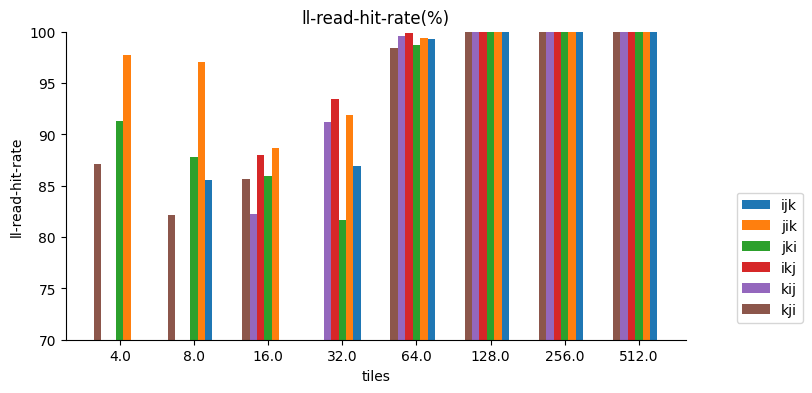

In [97]:
parameter = "ll-read-hit-rate"
fig = plt.figure(figsize=(8,4))
ax = fig.gca()
for ver in range(1,7):
    df_tile = query(df_2048, versions=[ver], tiles=[4,8,16,32,64,128,256,512])
    ax.bar(np.array(np.log2(df_tile["tile_size"]))+0.1*(3-ver), df_tile[parameter], width=0.1, label=version_mapping[ver])

ax.set_ylabel(parameter)
ax.set_ylim(70,100)
ax.set_xlabel("tiles")
ax.set_xticklabels([""] + list(np.logspace(2,9, base=2,num=8)) +[""])
ax.set_title(parameter + "(%)")
sns.despine()
plt.legend(bbox_to_anchor=(1.2,0.5))

/tmp/ipykernel_12758/4168416142.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([""] + list(np.logspace(2,9, base=2,num=8)) +[""])


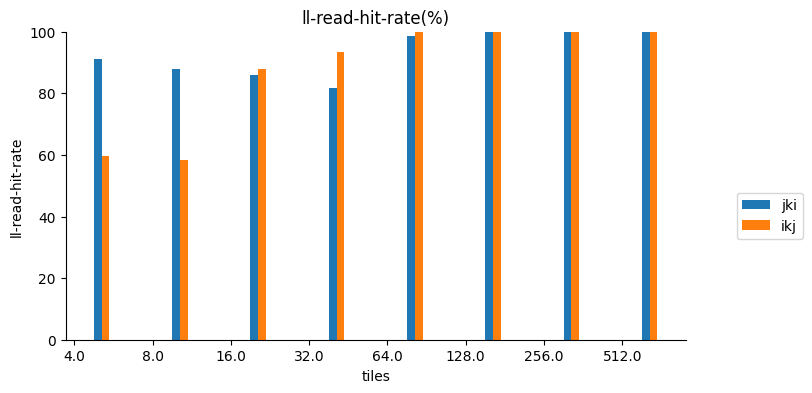

In [32]:
parameter = "ll-read-hit-rate"
fig = plt.figure(figsize=(8,4))
ax = fig.gca()
for ver in [3,4]:
    df_tile = query(df_2048, versions=[ver], tiles=[4,8,16,32,64,128,256,512])
    ax.bar(np.array(np.log2(df_tile["tile_size"]))+0.1*ver, df_tile[parameter], width=0.1, label=version_mapping[ver])

ax.set_ylabel(parameter)
ax.set_ylim(0,100)
ax.set_xlabel("tiles")
ax.set_xticklabels([""] + list(np.logspace(2,9, base=2,num=8)) +[""])
ax.set_title(parameter + "(%)")
sns.despine()
plt.legend(bbox_to_anchor=(1.2,0.5))

### DTLB write misses

/tmp/ipykernel_12758/13626588.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(version_ticks)


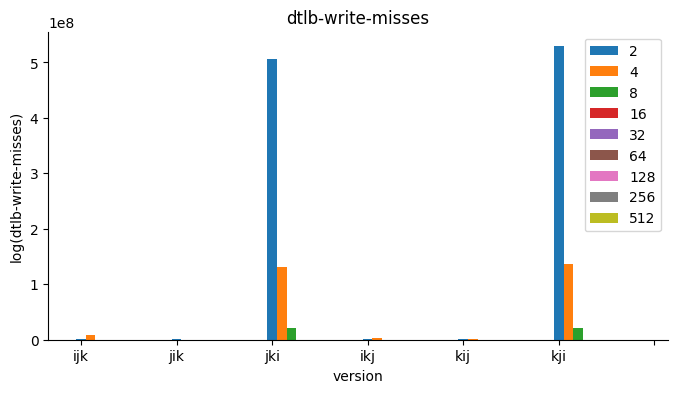

In [27]:
parameter = "dtlb-write-misses"
fig = plt.figure(figsize=(8,4))
ax = fig.gca()
for ind,tile in enumerate(all_tiles):
    df_tile = query(df_2048, tiles=[tile])
    ax.bar(np.array(df_tile["version"])+0.1*ind, df_tile[parameter], width=0.1, label=tile)
ax.set_xticklabels(version_ticks)
ax.set_ylabel(f"log({parameter})")
ax.set_xlabel("version")
ax.set_title(parameter)
sns.despine()
plt.legend();

In [33]:
df_2048

,version,matrix_size,tile_size,instructions,cpu-cycles,branch-misses,branch-instructions,cache-references,cache-misses,dtlb-read-accesses,...,ll-read-accesses,ll-read-misses,ll-write-accesses,ll-write-misses,time-elapsed,page_fault,version_word,cache-hit-rate,l1d-read-hit-rate,ll-read-hit-rate
0,4,2048,256,386826526478,138917110154,33687916,8687361324,16018944906,3589048,129085098795,...,8171622607,97067,436338,17,44.984342081s,0,ikj,99.977595,93.357988,99.998812
1,2,2048,128,387357090904,130977802524,67679257,8791445180,6303589516,10909524,129386294476,...,3255156727,413786,649996,17,42.413703458s,0,jik,99.826932,93.386243,99.987288
2,4,2048,512,386728849611,142082703128,16811063,8636493919,17019828306,4068623,128936666220,...,8551627086,130532,325819,8,46.017356113s,0,ikj,99.976095,93.336678,99.998474
3,3,2048,4,424690368295,139909728645,346441,17060421292,6598772813,1546586379,151412035900,...,1086061550,94816621,4028,816,48.250997558s,0,jki,76.562515,98.038489,91.269683
4,2,2048,256,387028044384,142353542035,33695436,8689880422,16130277369,3937381,129107579815,...,8223571041,250105,531697,8,46.096207703s,0,jik,99.975590,93.353458,99.996959
5,1,2048,512,386619322595,140214362952,16810267,8637590192,17029574801,4078043,128954768427,...,8552832806,256782,287511,8,45.406670615s,0,ijk,99.976053,93.335390,99.996998
6,5,2048,2,491624471268,112372729534,1090617,31168140760,266108152,61544852,189038556787,...,7041962,3356095,306,161,36.394229707s,0,kij,76.872241,99.850339,52.341478
7,2,2048,2,490903293666,151243065866,1080715,31151597983,7985675589,272515997,188974399460,...,1552967560,35399736,149231,72465,49.760214423s,0,jik,96.587440,98.032319,97.720510
8,1,2048,8,403357798197,98386120656,16880363,12257426038,323079033,107845254,138592909381,...,106788077,15397314,1421,1370,31.918435902s,0,ijk,66.619544,99.656918,85.581430
9,1,2048,64,388363336459,116224803907,136449929,8997817277,255260213,18423985,129949053802,...,141748154,985532,36016,119,37.641817516s,0,ijk,92.782273,93.598009,99.304730


In [47]:
df_2048["dtlb-read-misses"]

0         127690
1         627400
2         145524
3      871727614
4         303173
5         177187
6        2847681
7      344124843
8       32753165
9        1582831
10        396502
11        280828
12     364029591
13        266825
14    3385901751
15      60565902
16     226963005
17       4532254
18        118182
19      10317974
20        184550
21      61170498
22       1603838
23        216891
24    3277354305
25      16264307
26      41005217
27        164387
28        748523
29       1056023
30      11656540
31        103800
32     129719468
33     870068101
34        423418
35        555439
36       2404992
37       1193529
38        540590
39       5526707
40        249472
41        123744
42        117519
43     223903684
44        150995
45       1017590
46        106932
47       4017885
48       4787329
49       2163883
50       4145745
51        281631
52      87477939
53      16216302
Name: dtlb-read-misses, dtype: int64

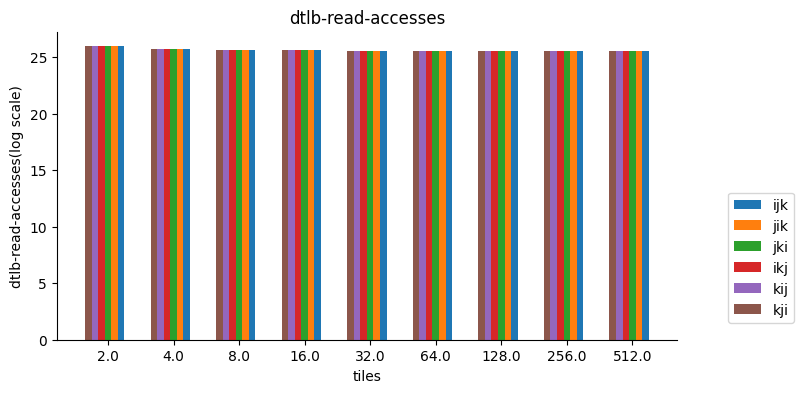

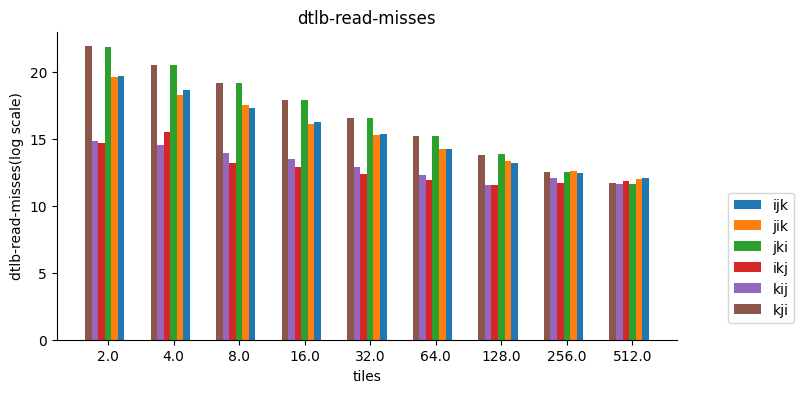

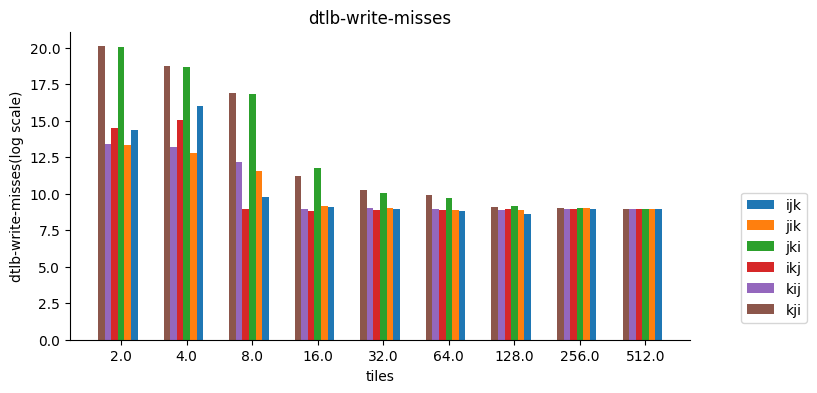

In [46]:
for parameter in ["dtlb-read-accesses","dtlb-read-misses", "dtlb-write-misses"]:
    fig = plt.figure(figsize=(8,4))
    ax = fig.gca()
    for ver in range(1,7):
        df_tile = query(df_2048, versions=[ver])
        ax.bar(np.array(np.log2(df_tile["tile_size"]))+0.1*(3-ver), np.log(df_tile[parameter]), width=0.1, label=version_mapping[ver])

    ax.set_ylabel(parameter + "(log scale)")
    ax.set_xlabel("tiles")
    ax.set_xticks(range(1,10))
    ax.set_xticklabels(list(np.logspace(1,9, base=2,num=9)))
    ax.set_title(parameter)
    sns.despine()
    plt.legend(bbox_to_anchor=(1.2,0.5))

In [37]:
ax.get_xticklabels()

[Text(0.0, 0, ''),
 Text(2.0, 0, '2.0'),
 Text(4.0, 0, '4.0'),
 Text(6.0, 0, '8.0'),
 Text(8.0, 0, '16.0'),
 Text(10.0, 0, '32.0')]